In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage import restoration
from skimage.segmentation import clear_border
from skimage.morphology import binary_closing
from skimage import measure
from skimage.measure import label, regionprops

import pandas as pd
from matplotlib.patches import Ellipse

from skimage import io, morphology, measure
import numpy as np
import os

import seaborn as sns
sns.set_context("poster")

In [2]:
def image_thresholding(img, thr):
    binary = img > thr
    binary = binary_closing(binary, footprint=np.ones((3, 3)))
    bead_binary = ~binary
    bead_binary = clear_border(bead_binary)
    return binary, bead_binary

In [3]:
folder_path = os.getcwd()
folder_path
name_arr=[]
aspectratio_arr=[]
circularity_arr=[]
shapefactor_arr=[]
asymfluo_arr=[]

/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_005.tif_cropped_blob_3.tif


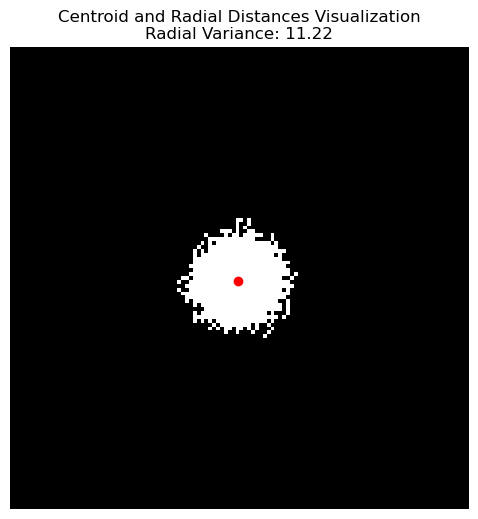

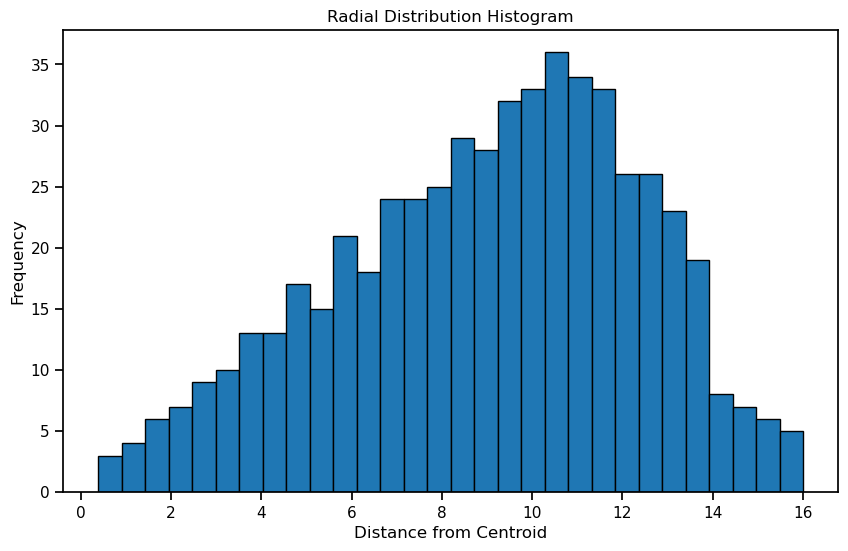

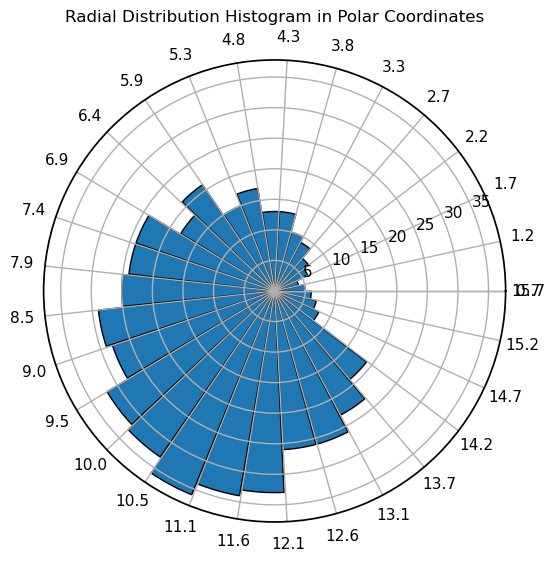

/var/folders/m5/xxlr4bhn6n59z9dv4wl4xsq00000gn/T/ipykernel_20823/3253746475.py:166: RuntimeWarning: Mean of empty slice.
  bin_means = [intensity_values[digitized == i].mean() for i in range(1, len(bins))]
/Users/anshumanjaysingh/anaconda3/envs/biostats/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anshumanjaysingh/anaconda3/envs/biostats/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/anshumanjaysingh/anaconda3/envs/biostats/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/anshumanjaysingh/anaconda3/envs/biostats/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered 

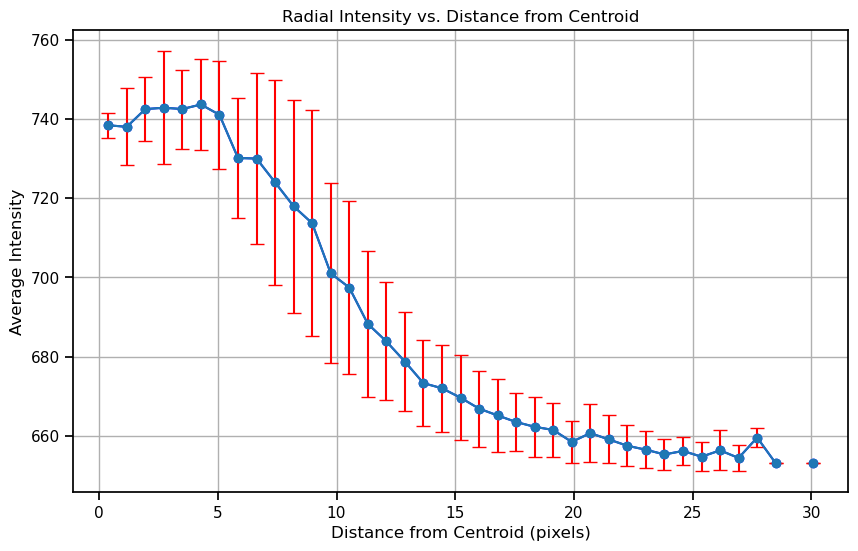

nan
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_002.tif_cropped_blob_2.tif


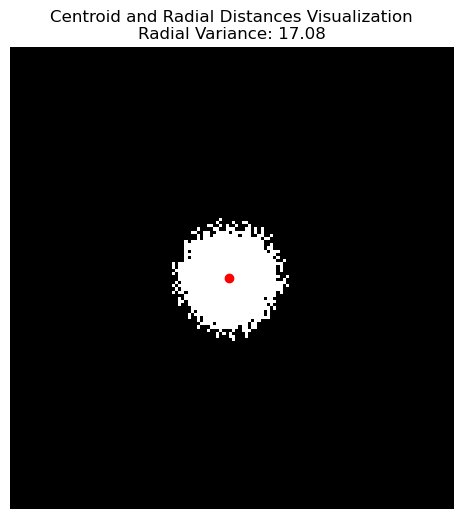

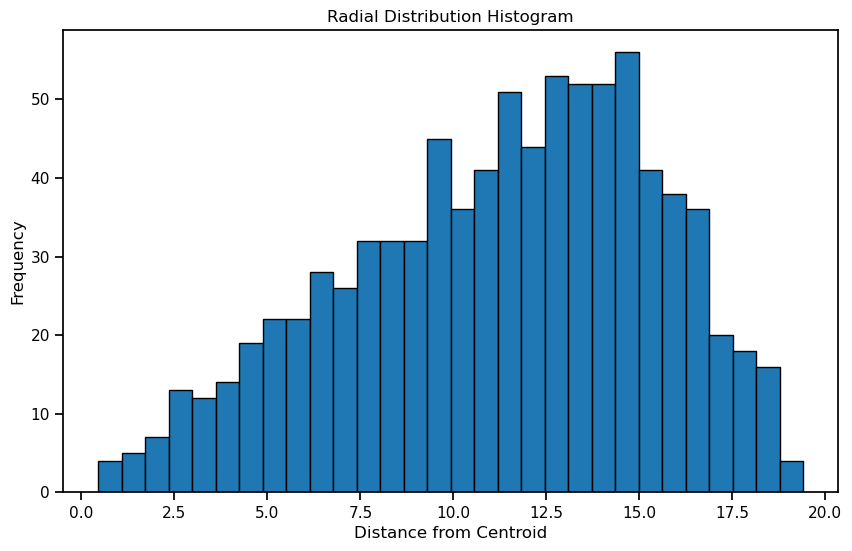

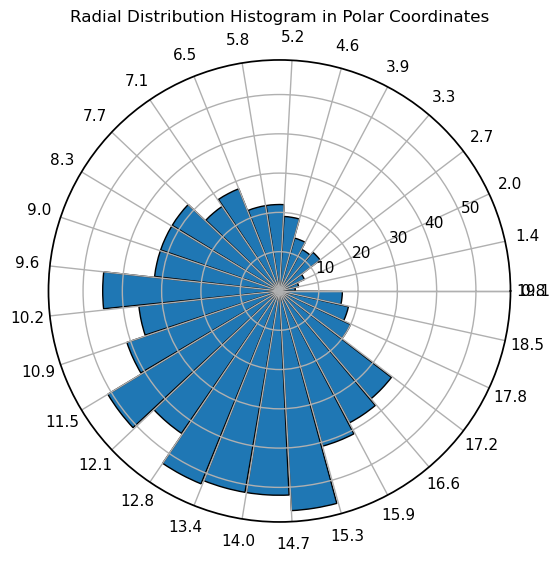

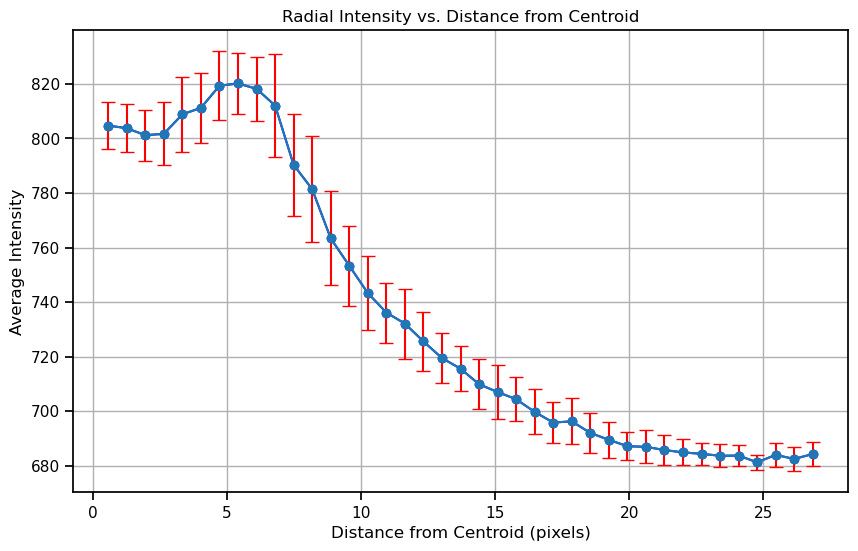

0.01290637470776244
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_008.tif_cropped_blob_2.tif


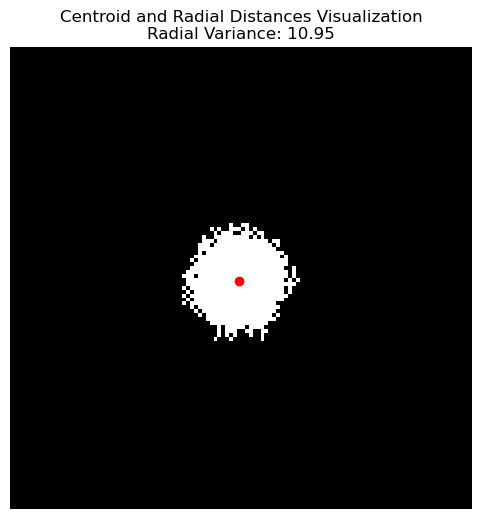

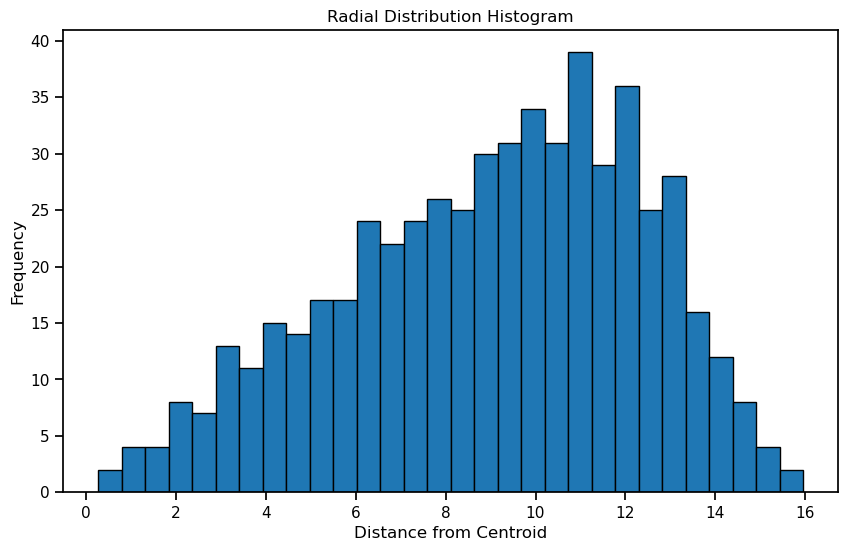

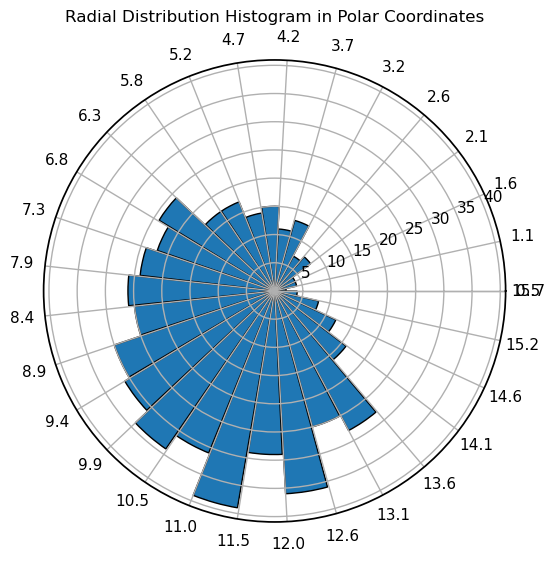

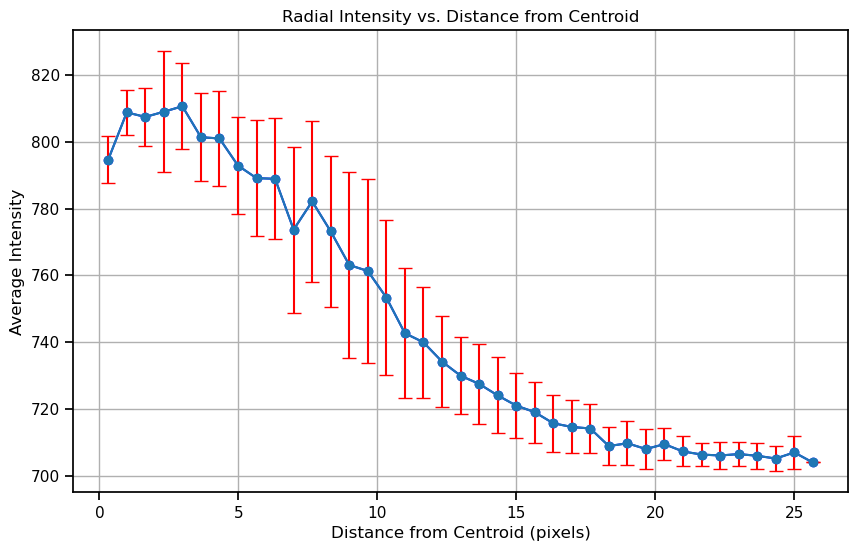

0.01590998805188303
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_006.tif_cropped_blob_3.tif


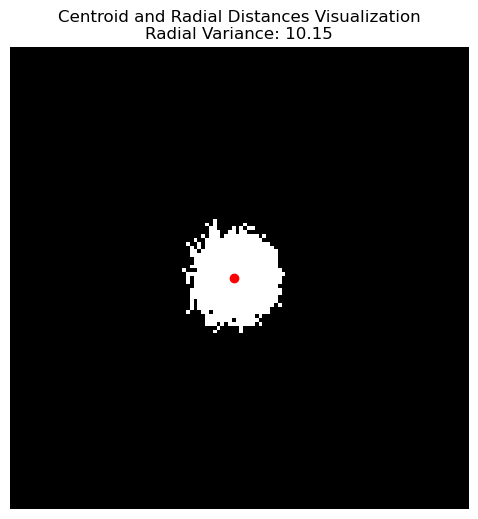

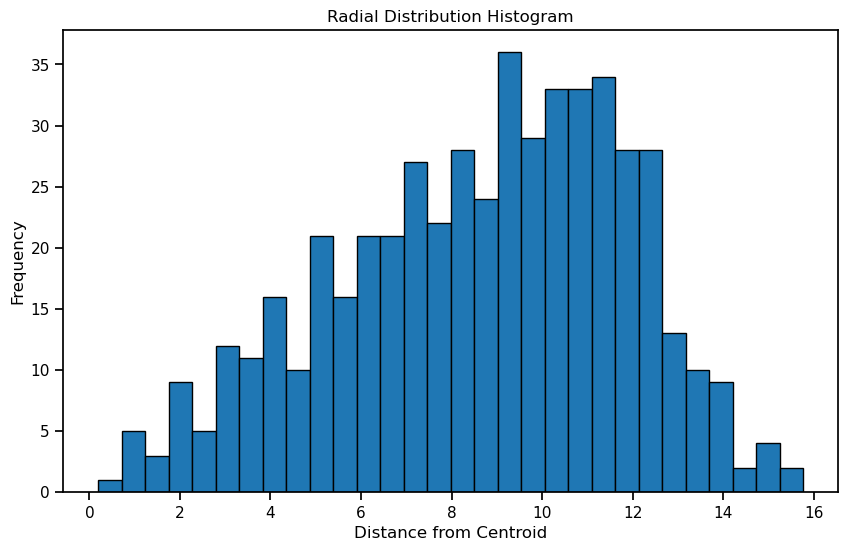

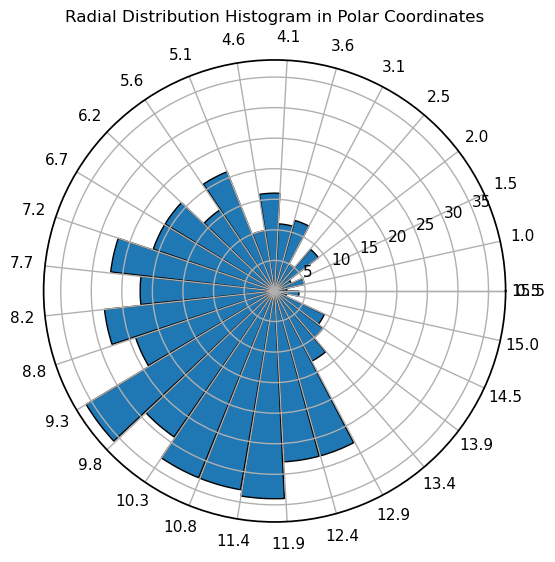

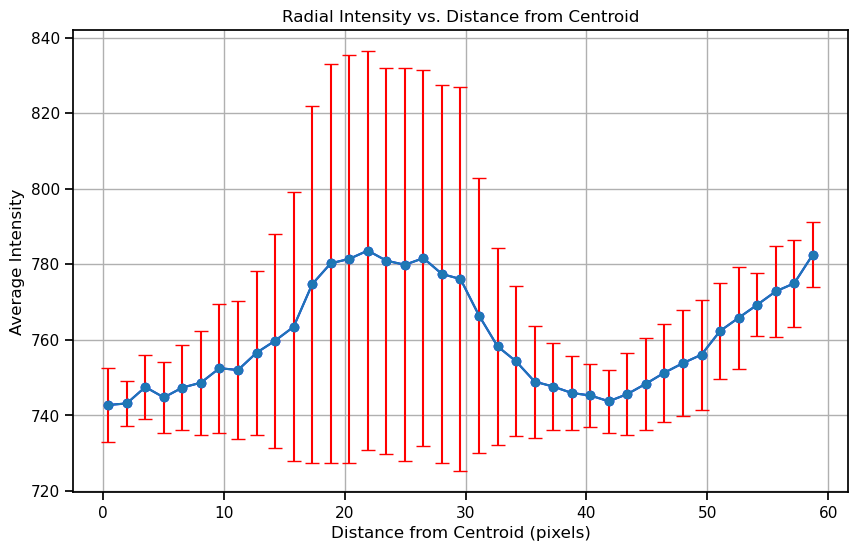

0.030551588612622905
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_001.tif_cropped_blob_1.tif


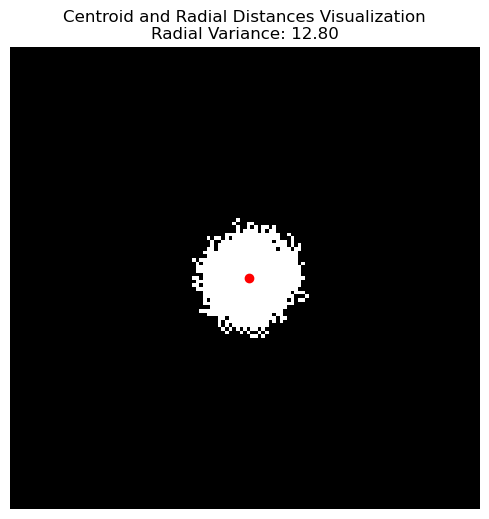

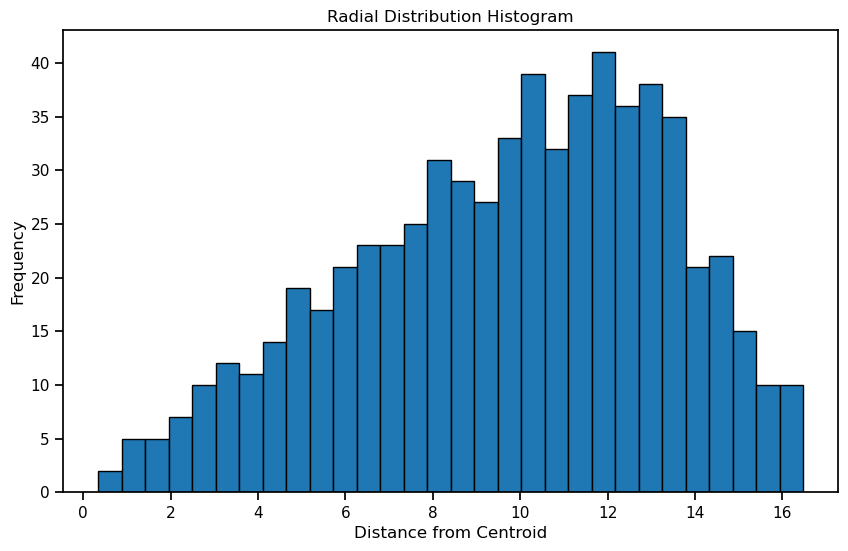

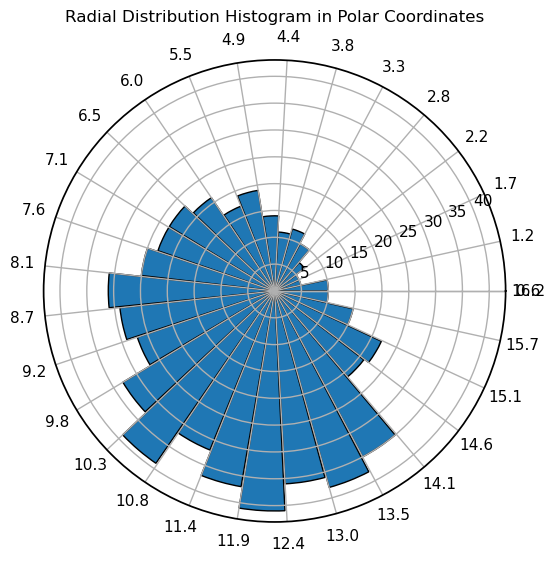

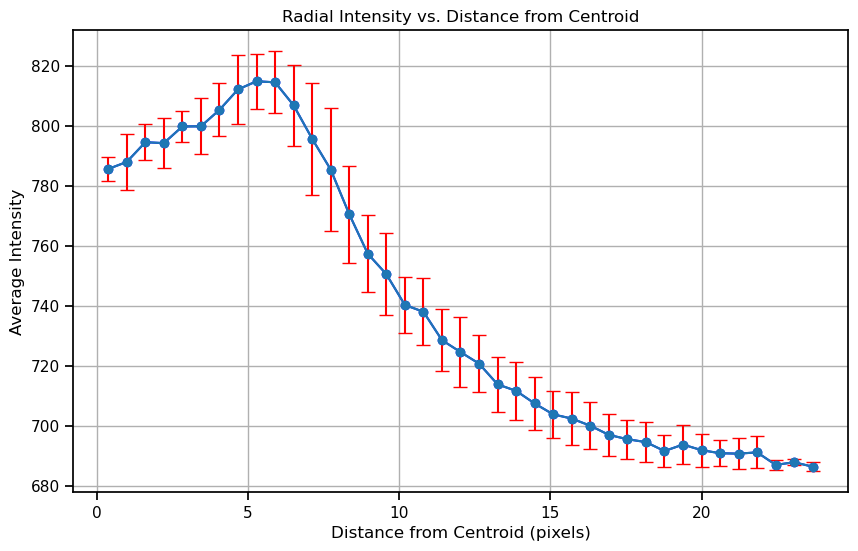

0.011700925563440828
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_000.tif_cropped_blob_1.tif


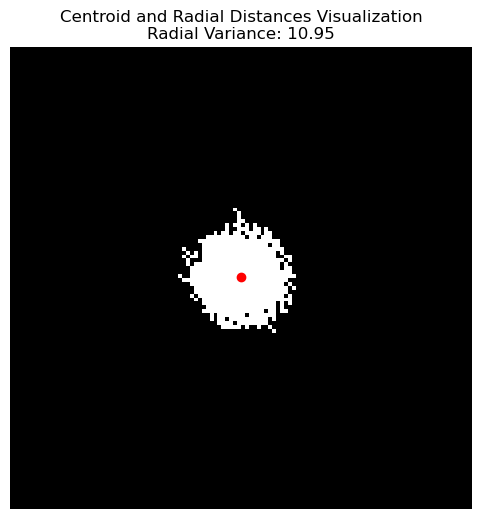

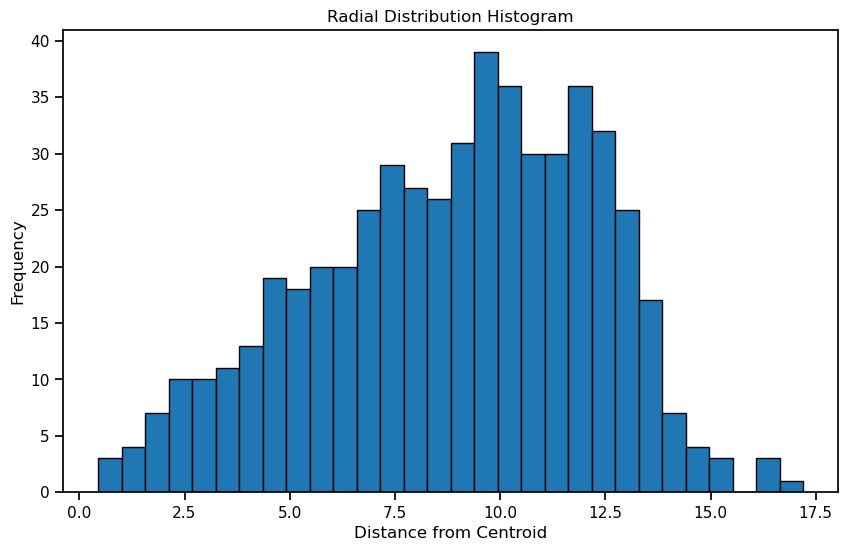

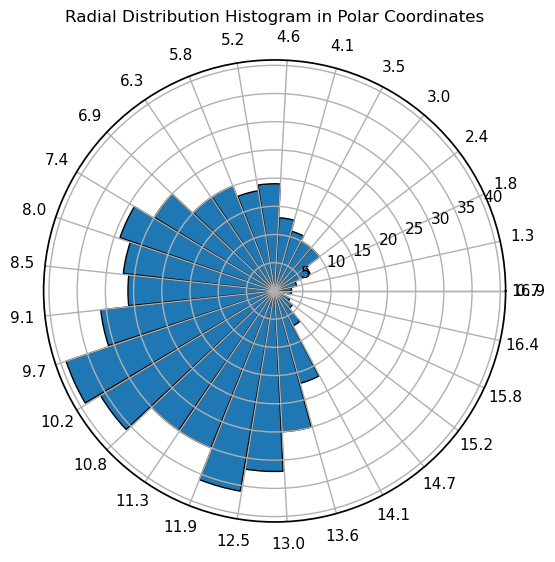

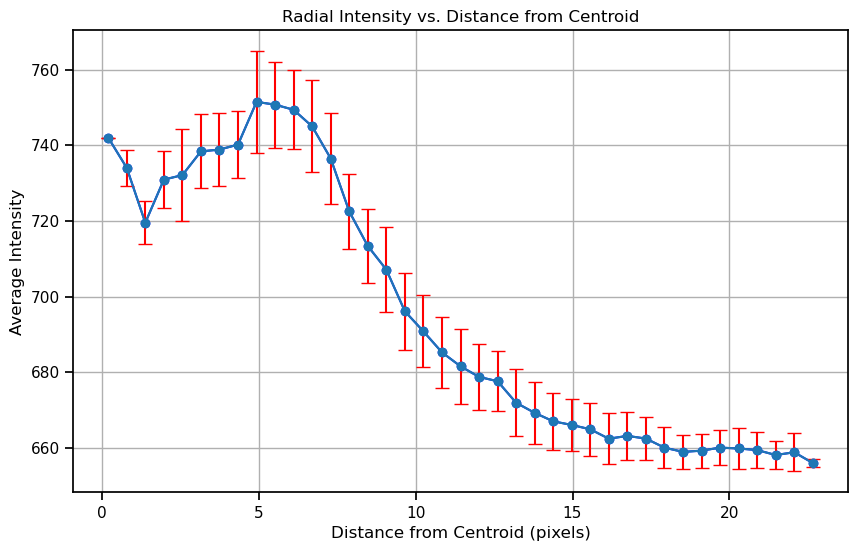

0.011104023411846214
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_003.tif_cropped_blob_4.tif


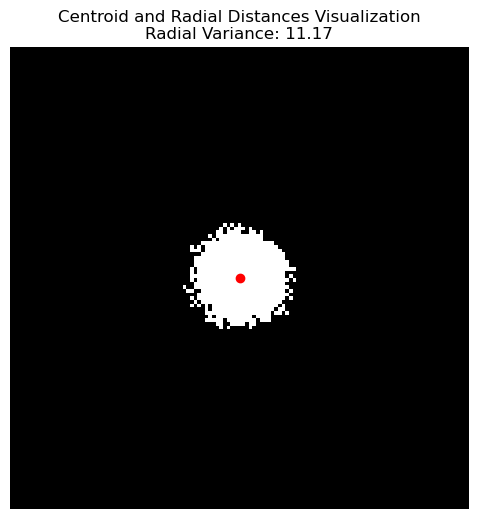

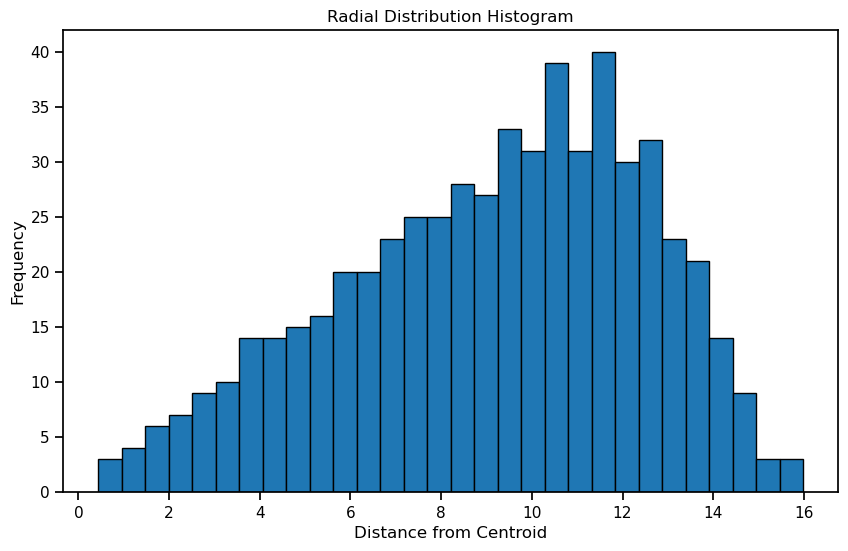

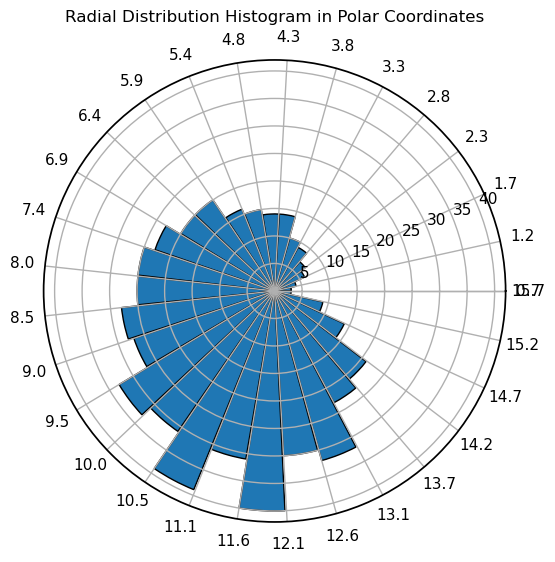

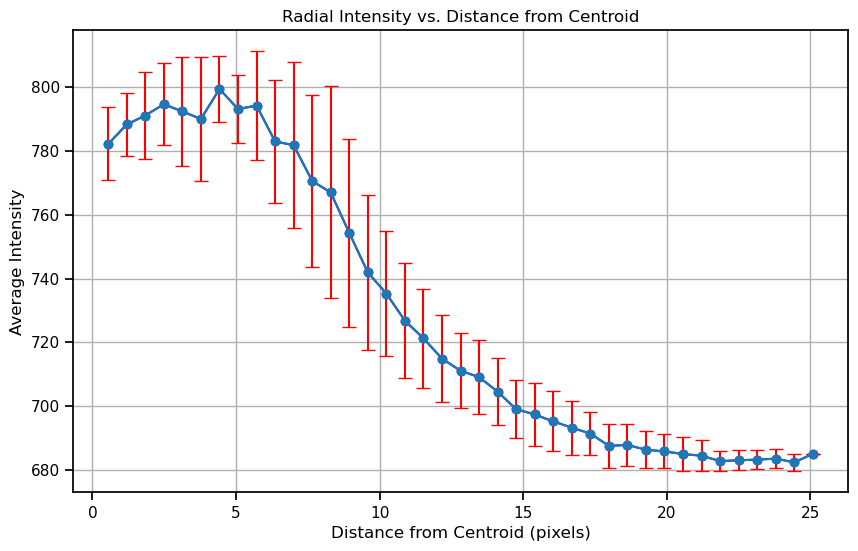

0.016827127623533663
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_007.tif_cropped_blob_1.tif


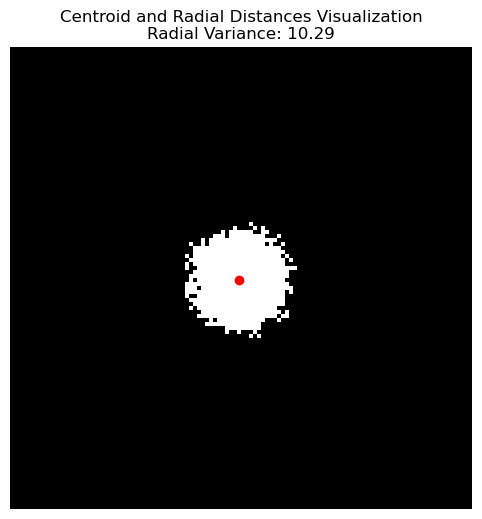

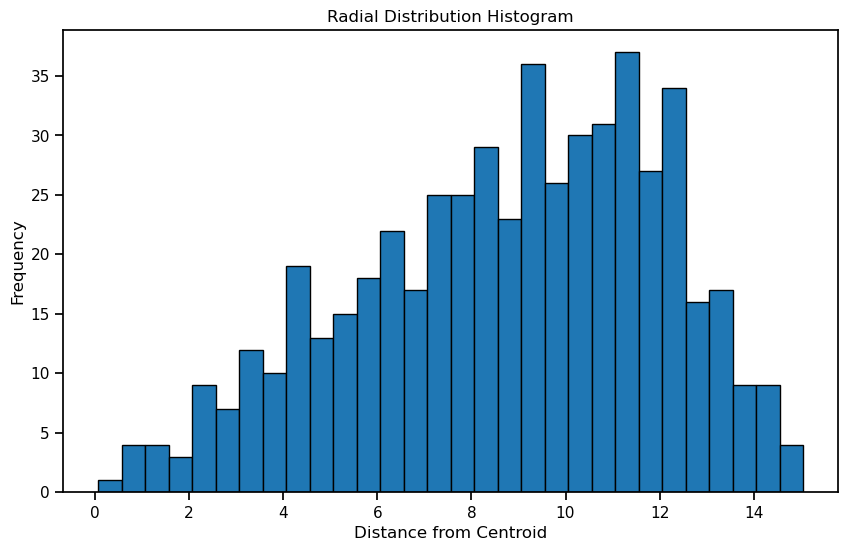

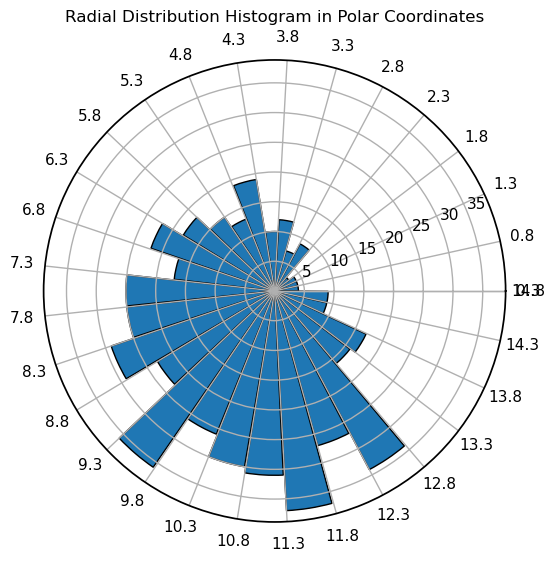

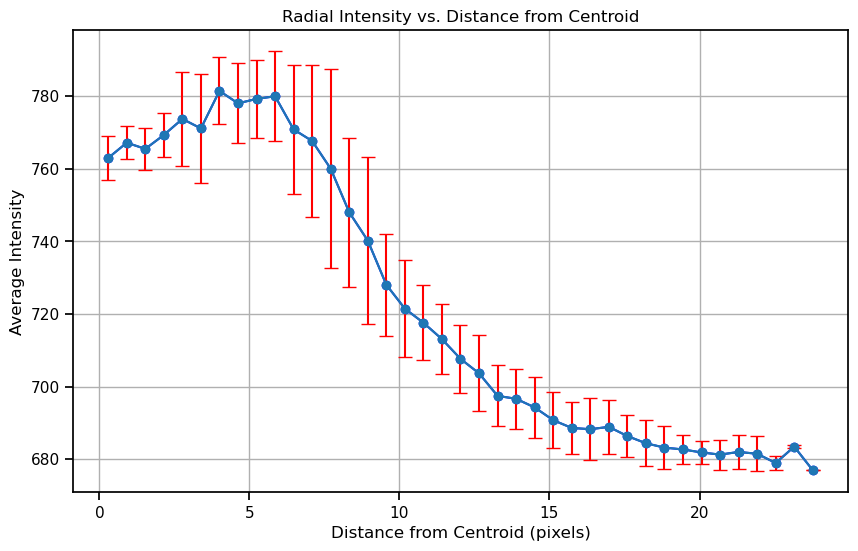

0.013067174731168845
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_009.tif_cropped_blob_3.tif


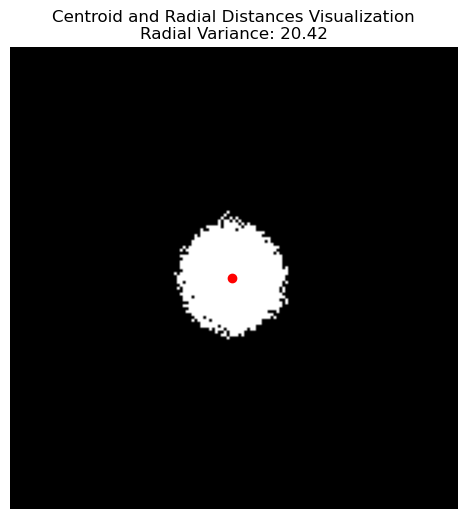

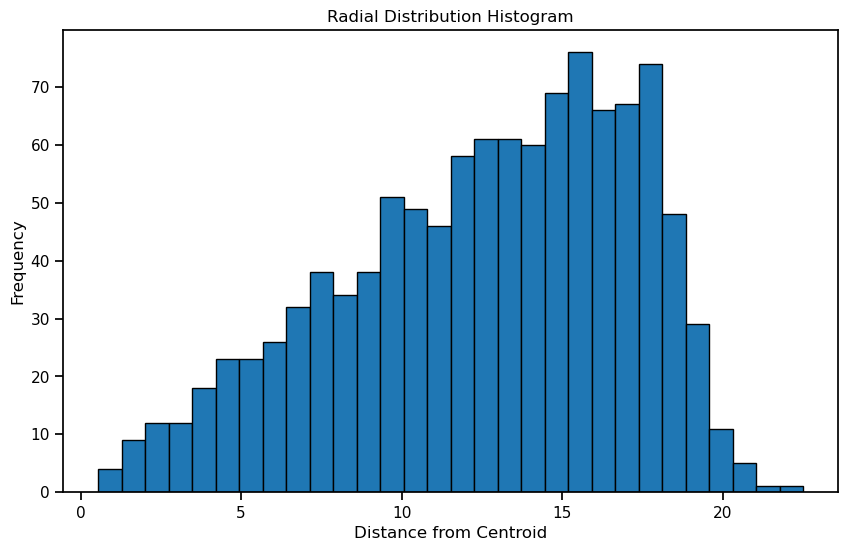

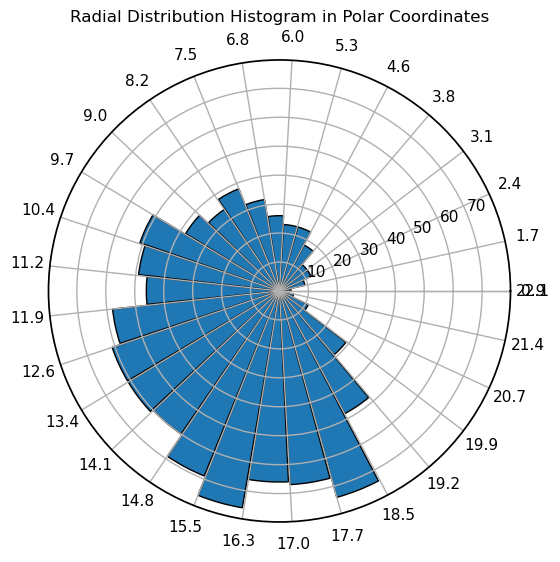

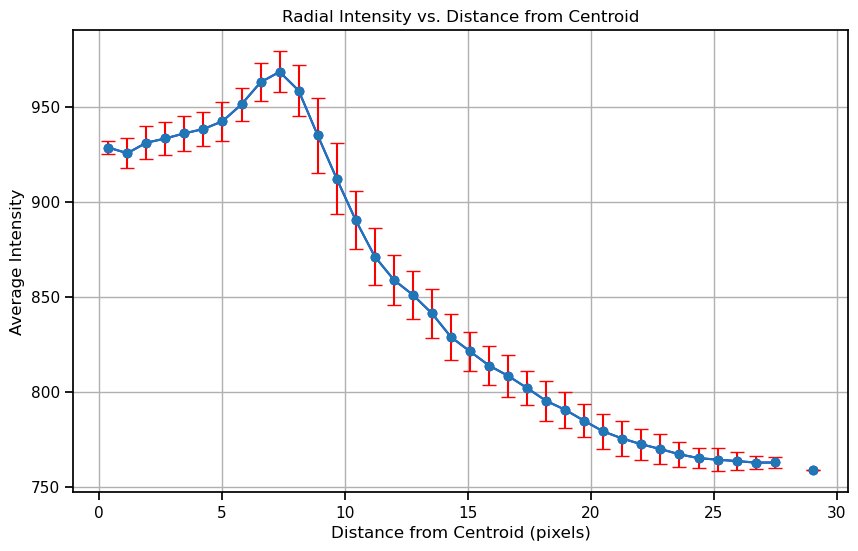

nan
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_004.tif_cropped_blob_2.tif


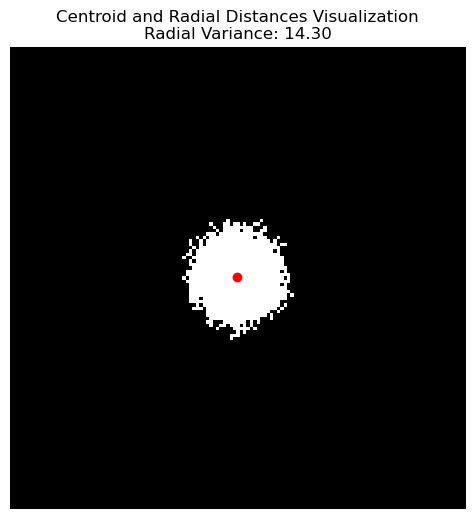

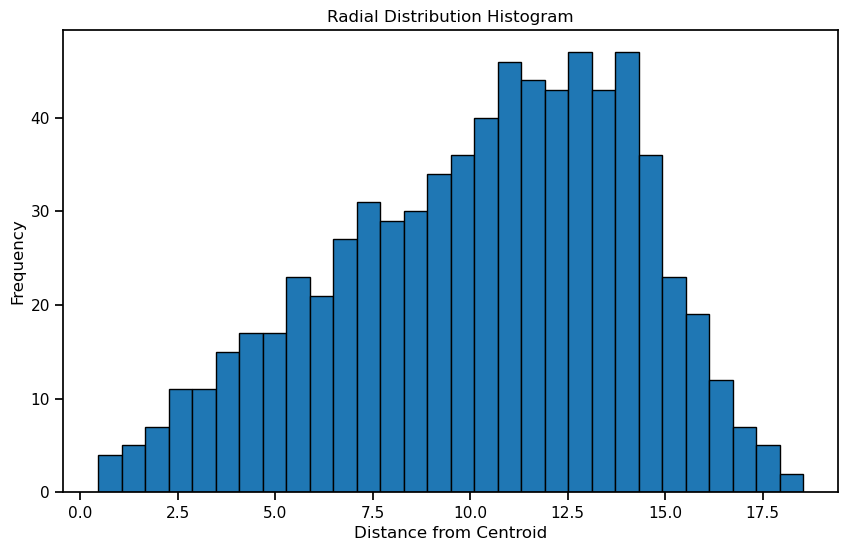

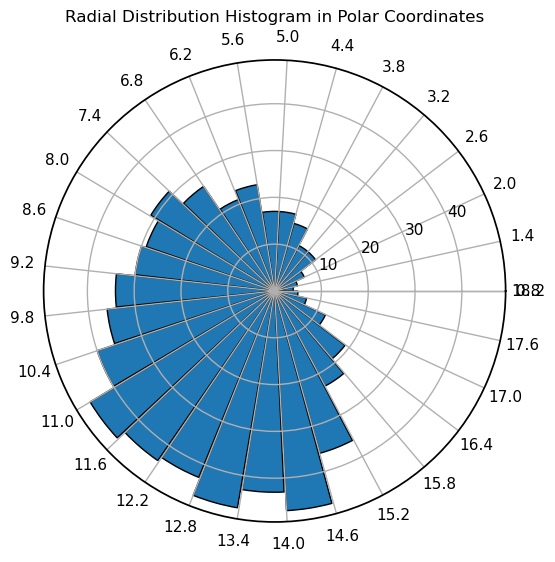

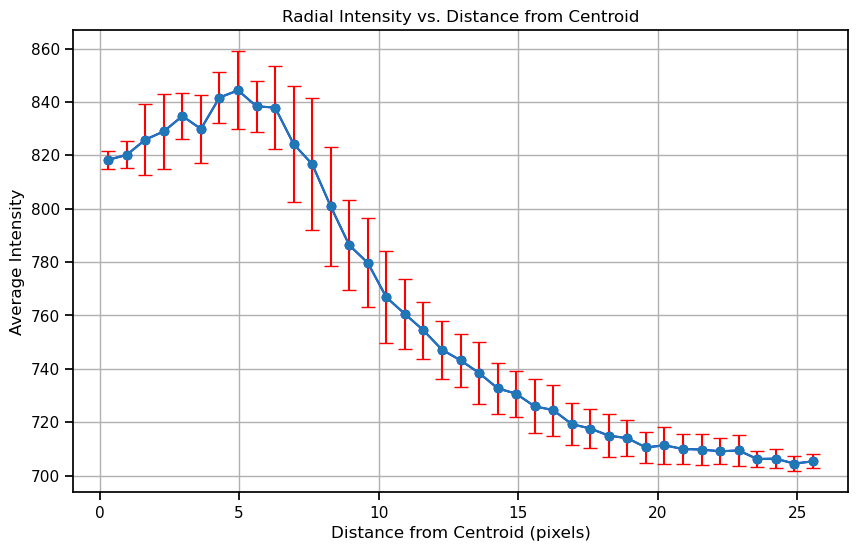

0.013360992416660177
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_004.tif_cropped_blob_3.tif


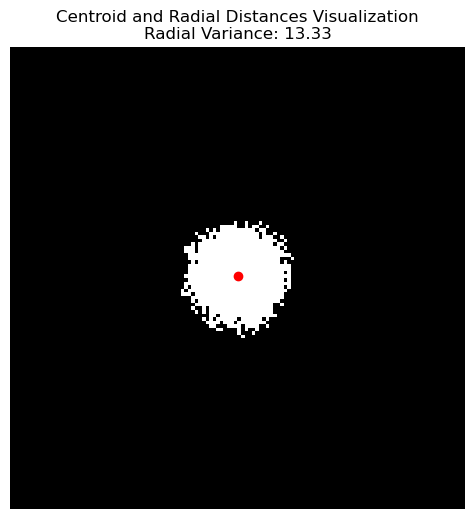

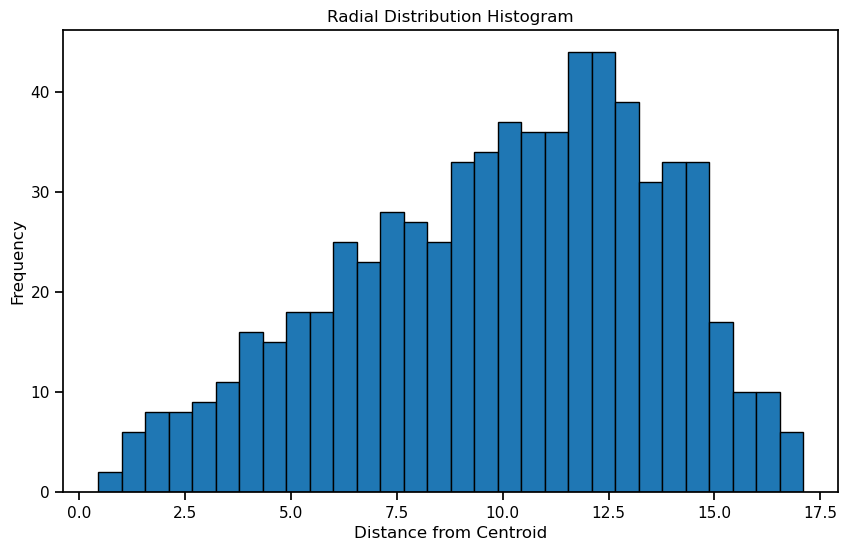

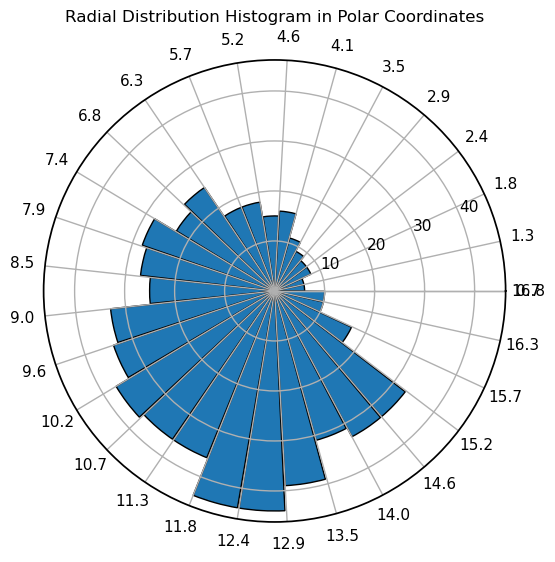

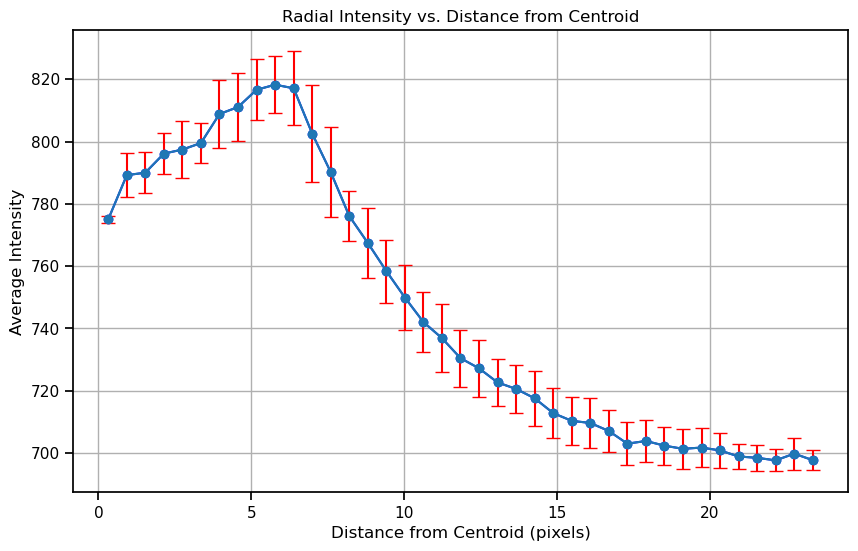

0.01070085128135126
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_011.tif_cropped_blob_1.tif


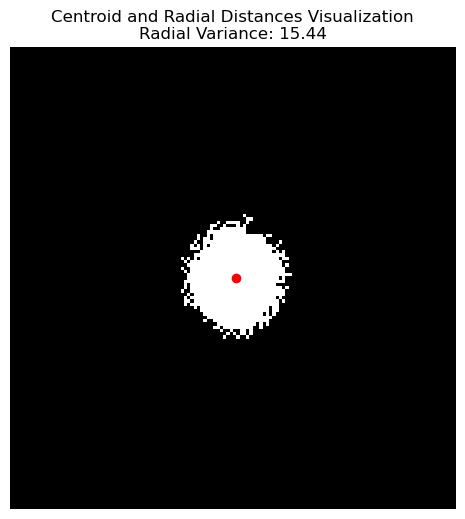

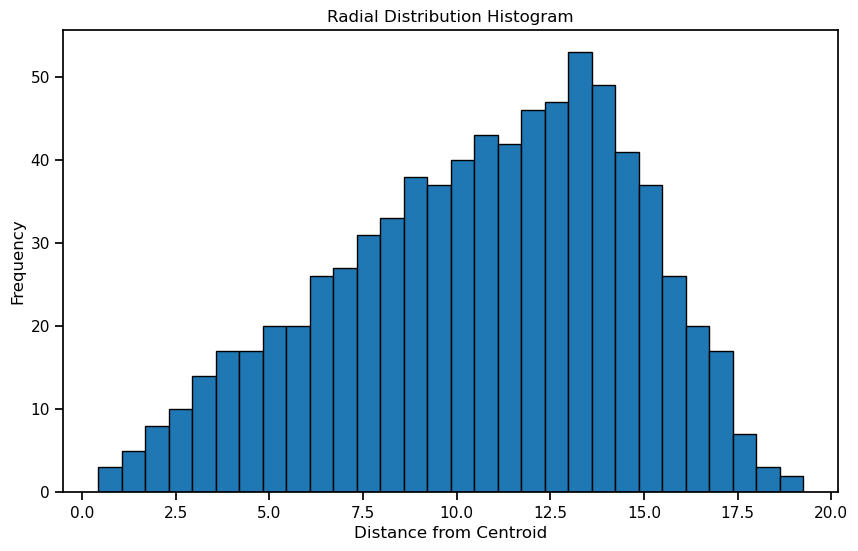

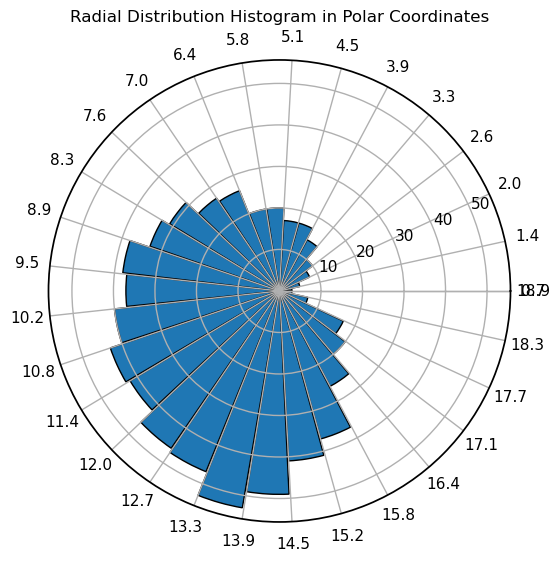

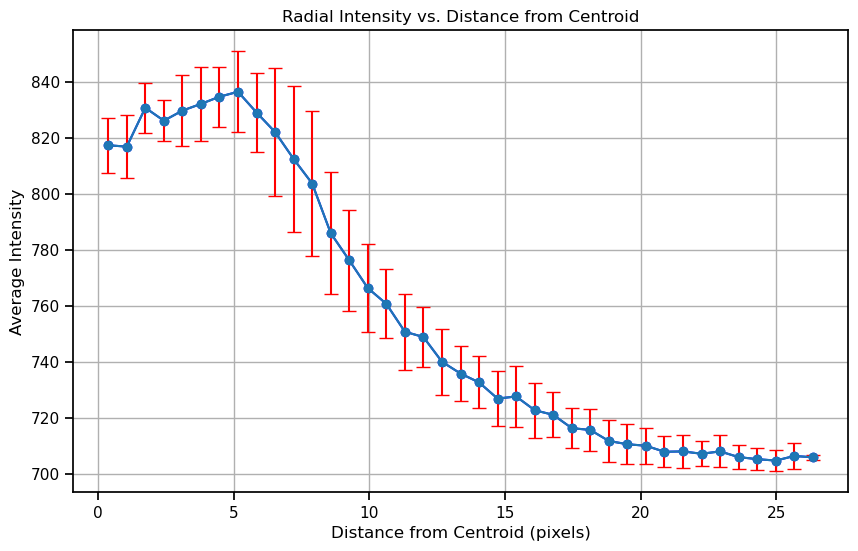

0.014016378474390774
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_016.tif_cropped_blob_3.tif


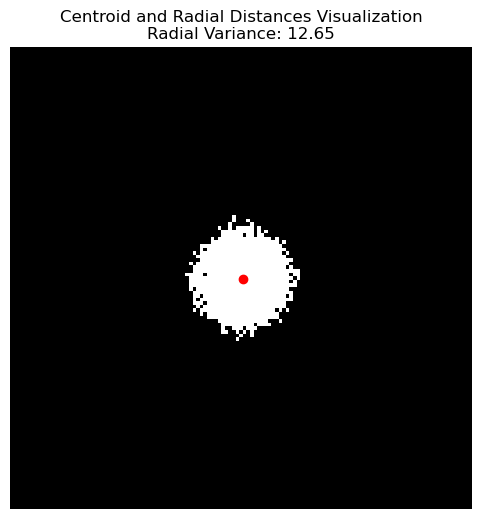

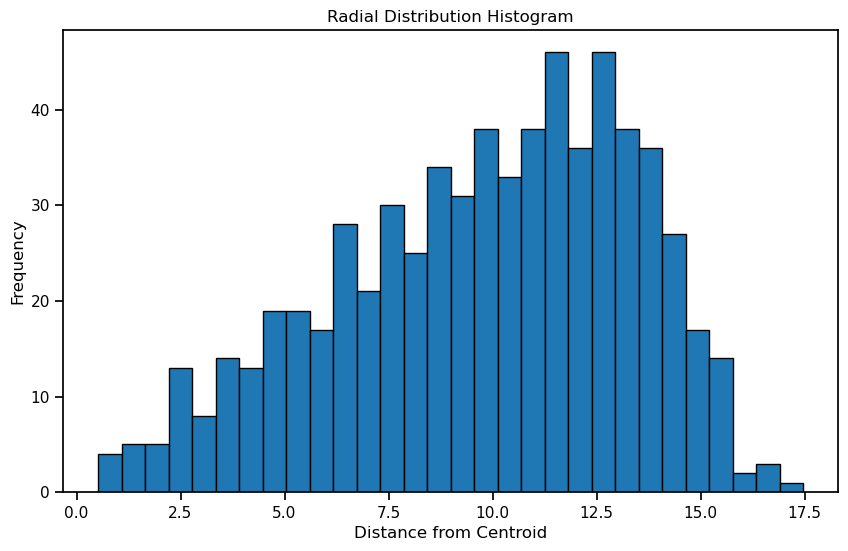

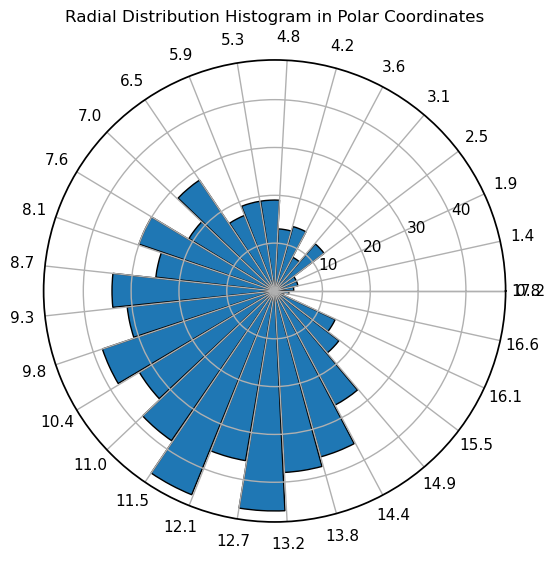

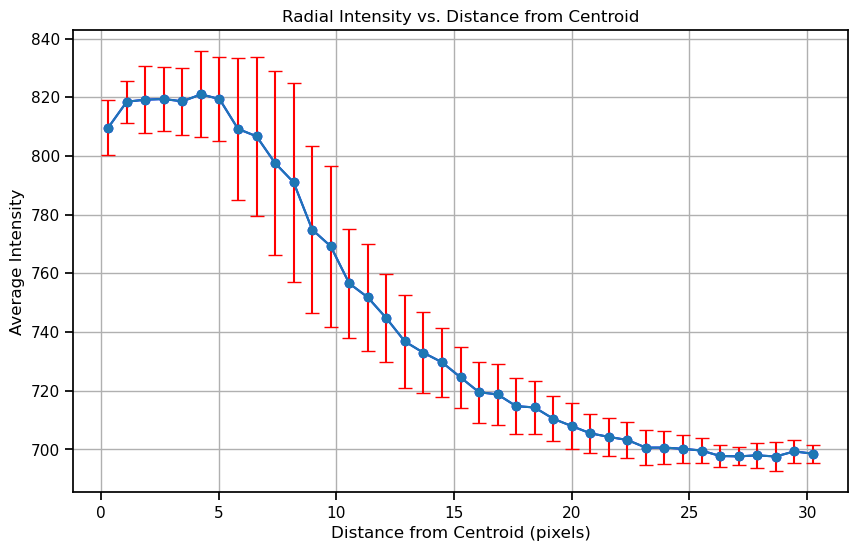

0.016289150664907732
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_020.tif_cropped_blob_2.tif


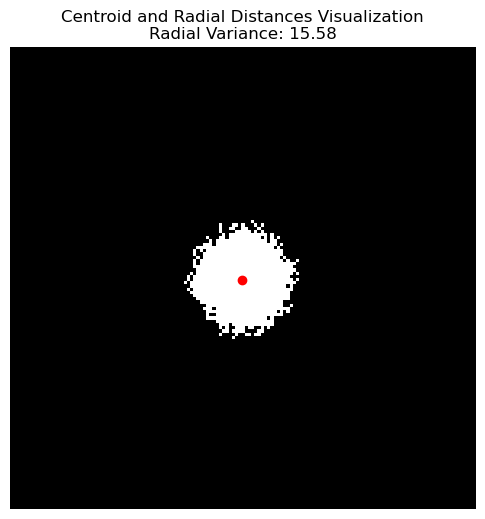

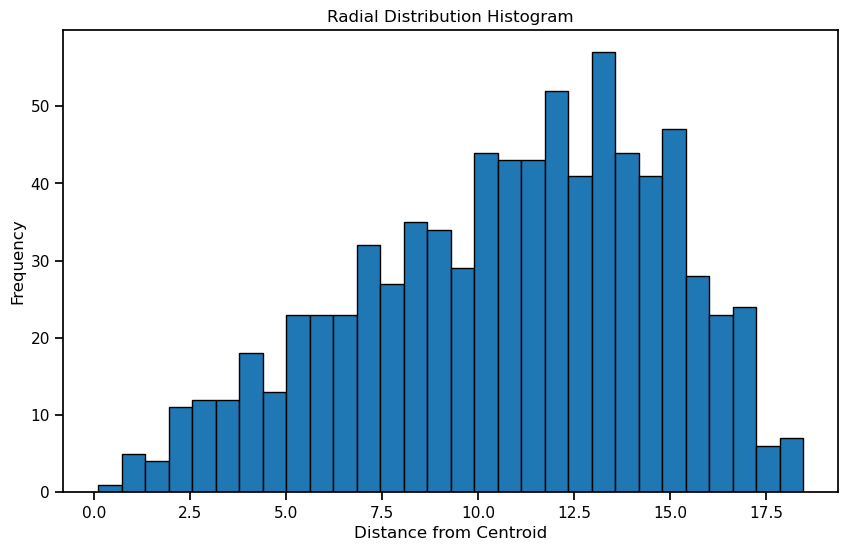

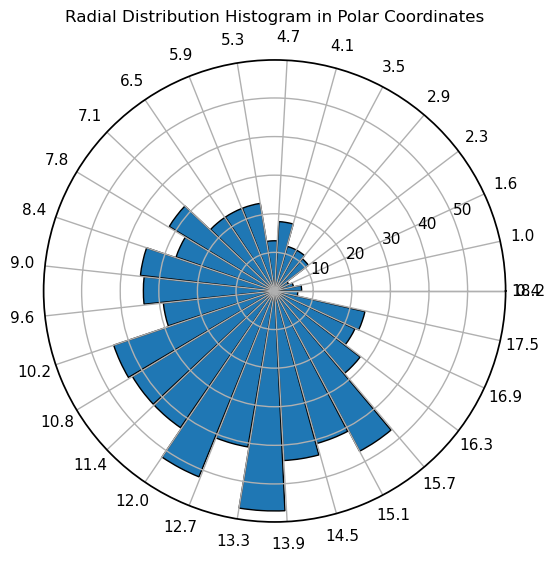

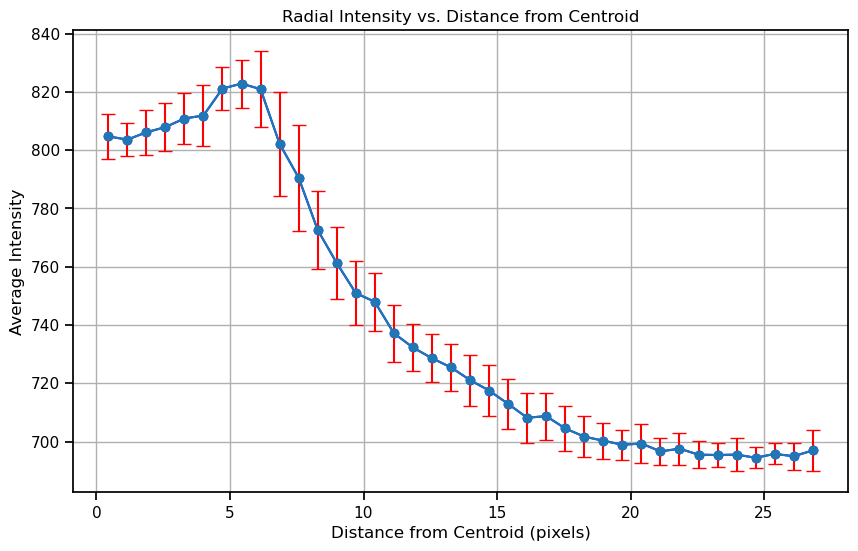

nan
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_018.tif_cropped_blob_2.tif


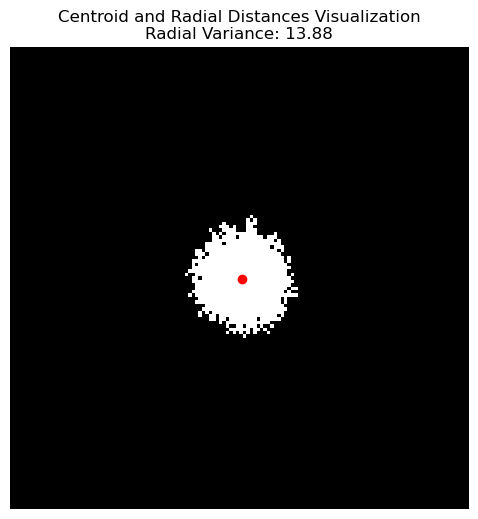

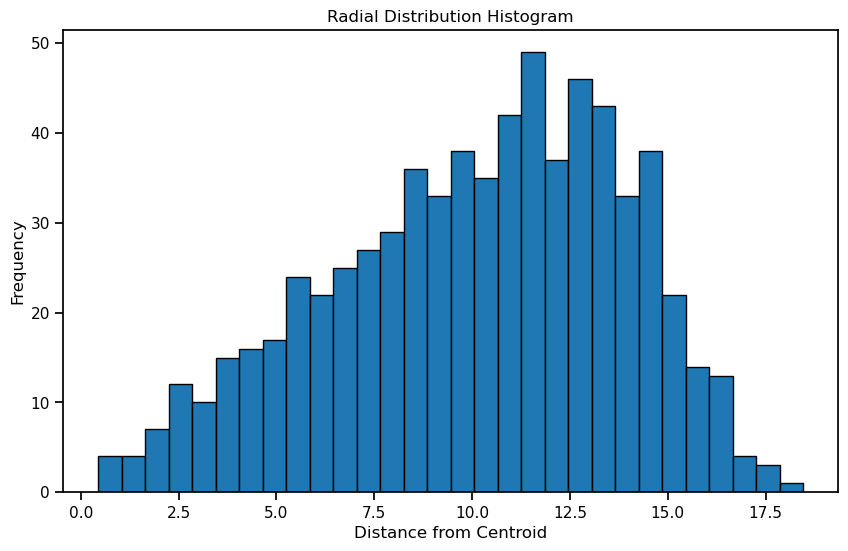

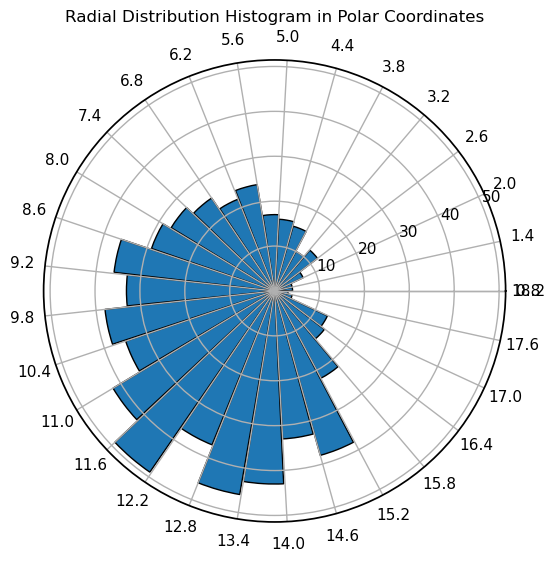

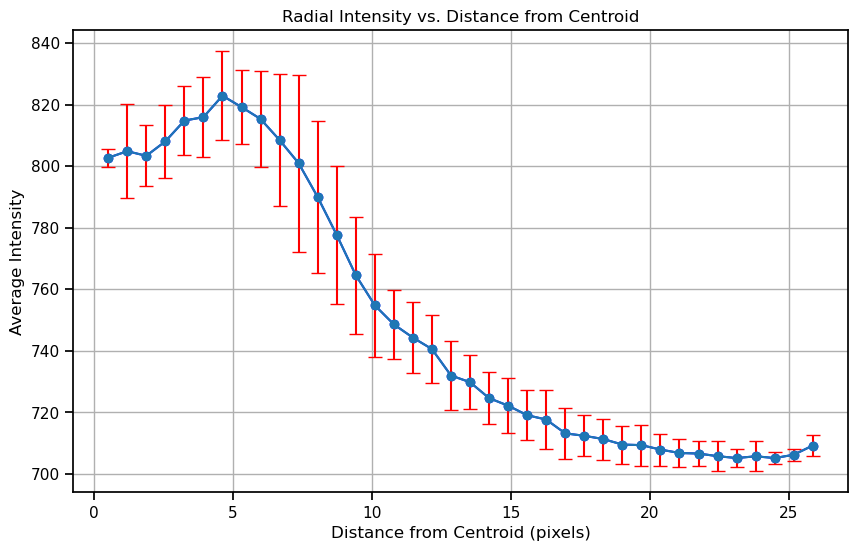

nan
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_012.tif_cropped_blob_2.tif


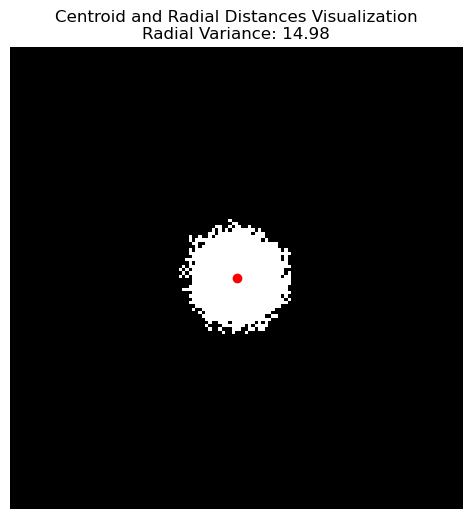

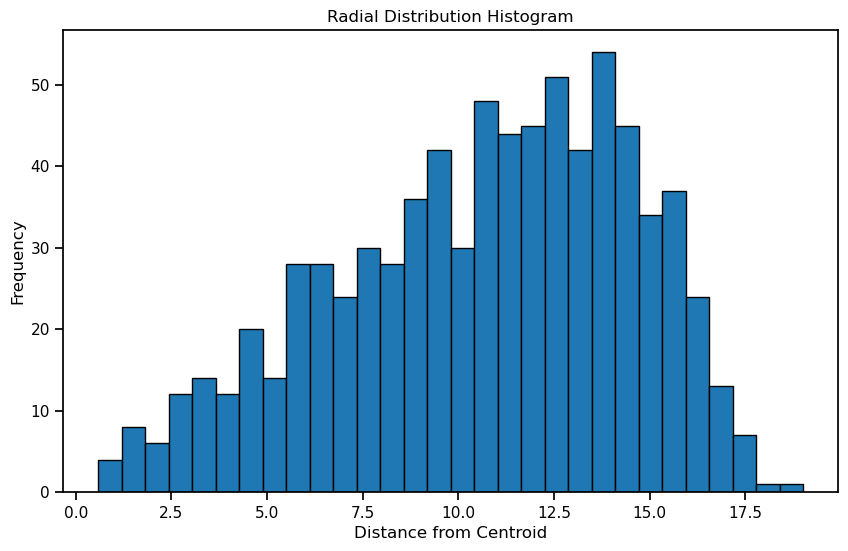

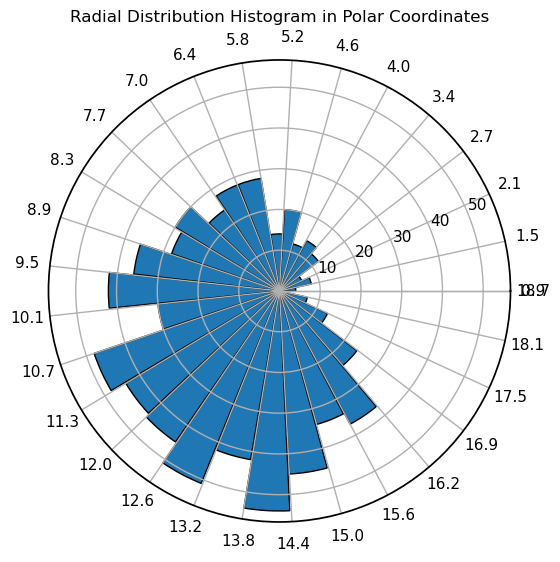

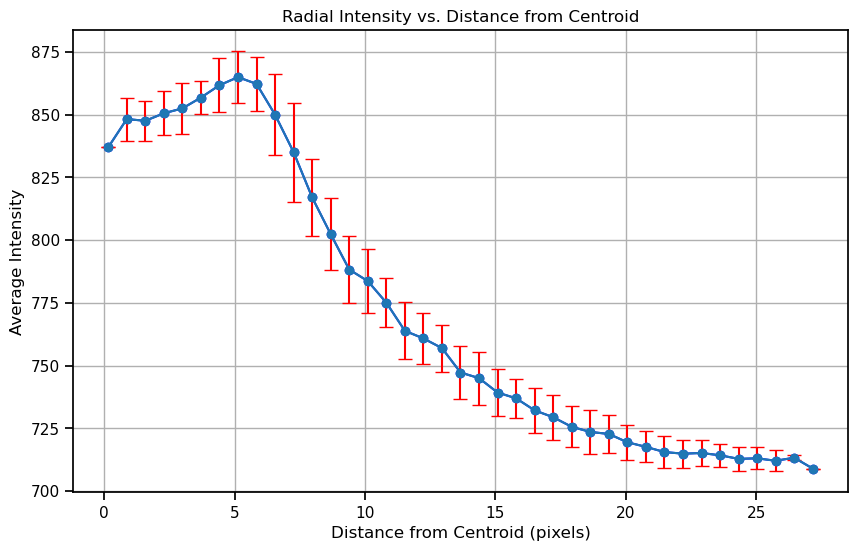

0.011226660781404493
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_015.tif_cropped_blob_1.tif


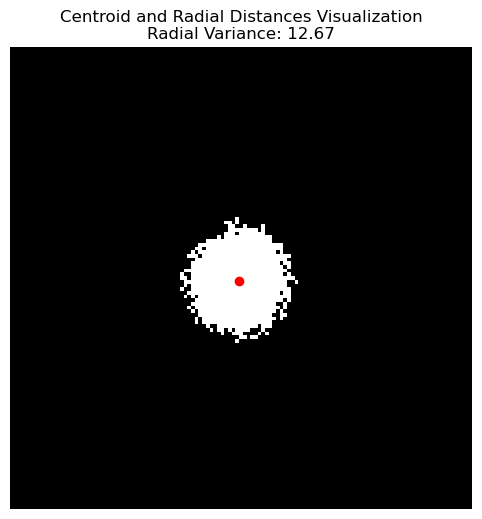

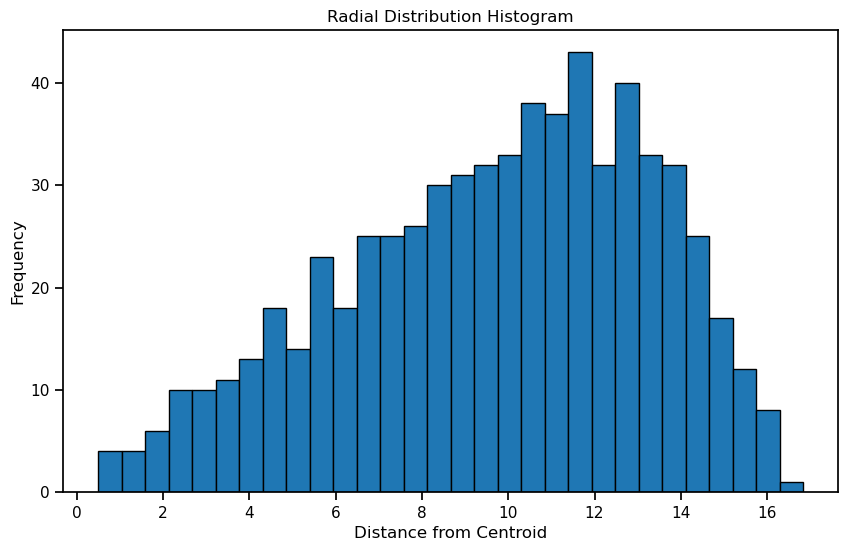

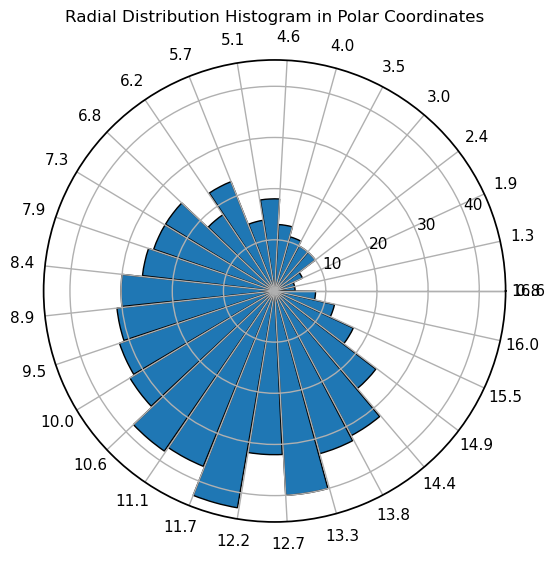

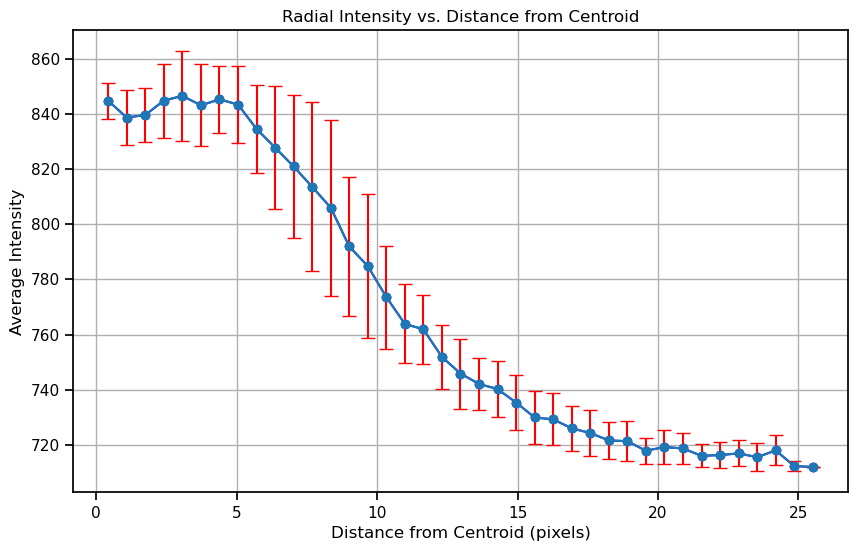

0.015605472613502949
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_019.tif_cropped_blob_1.tif


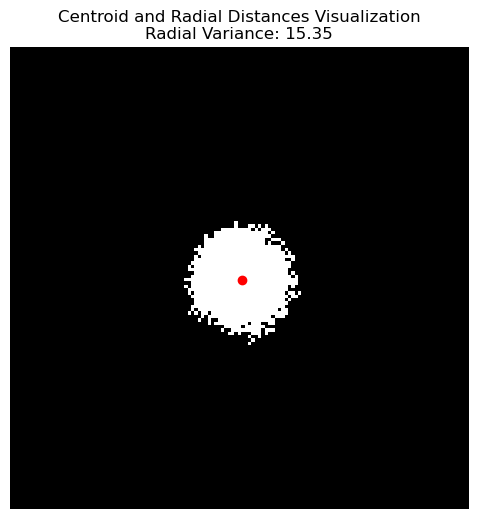

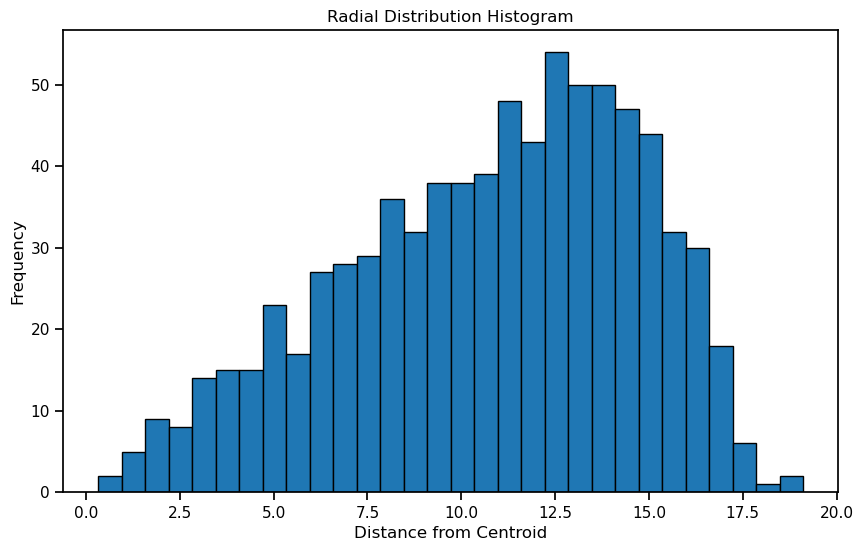

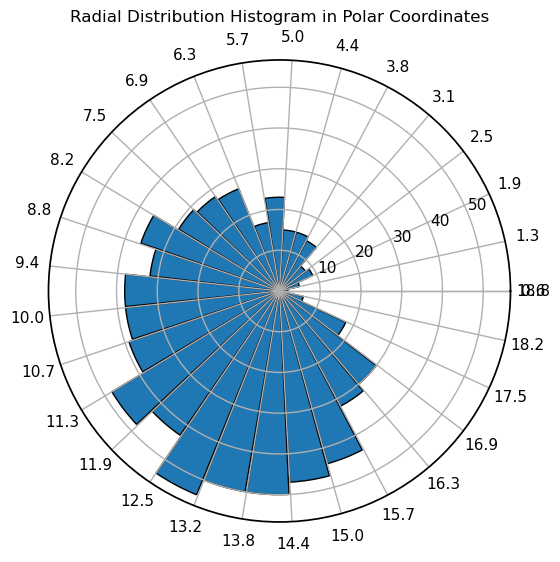

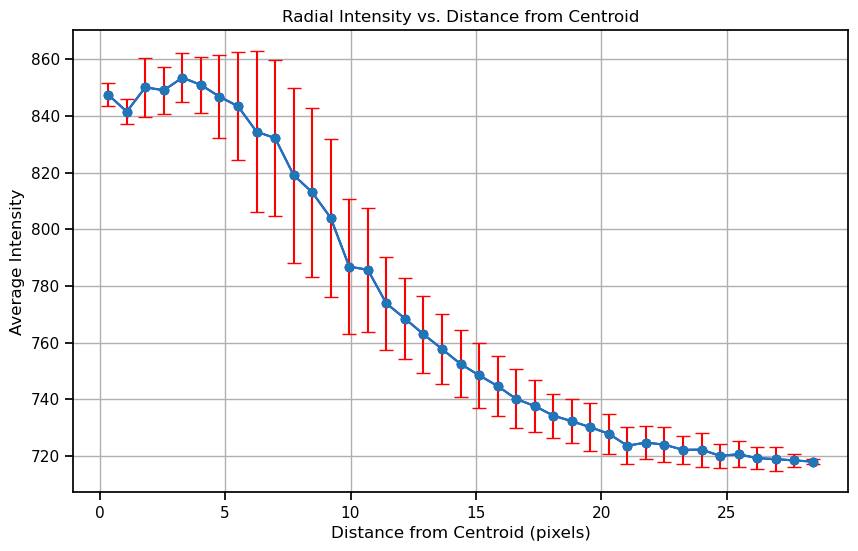

0.015316299923372545
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_014.tif_cropped_blob_4.tif


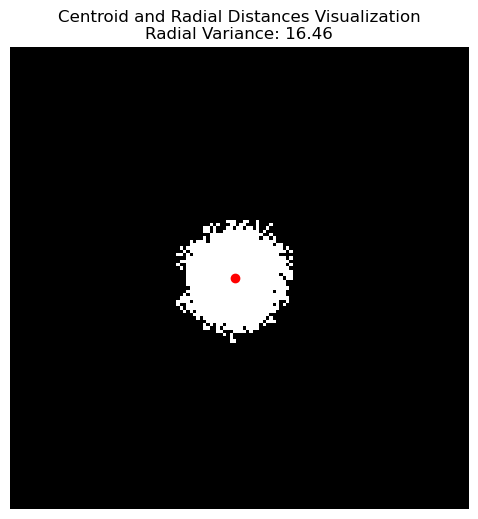

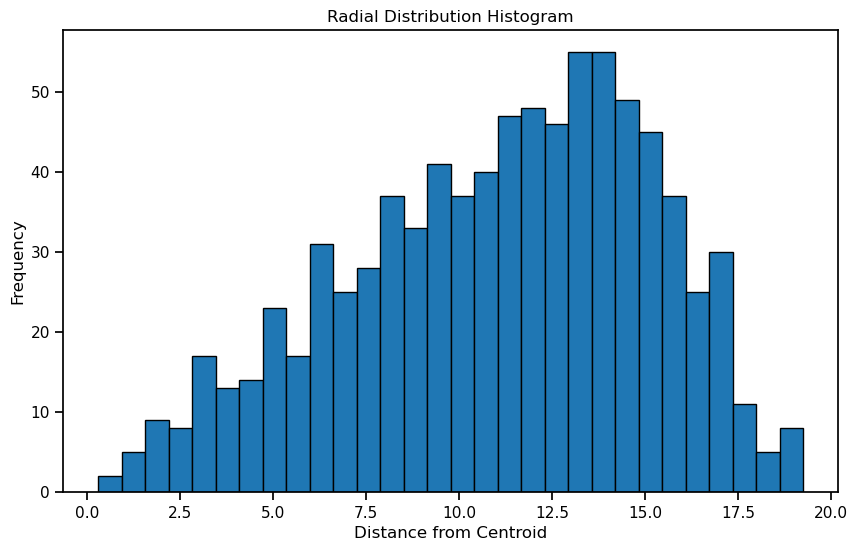

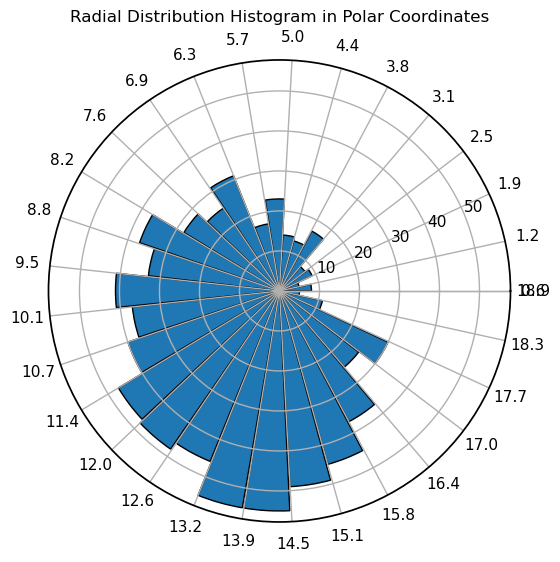

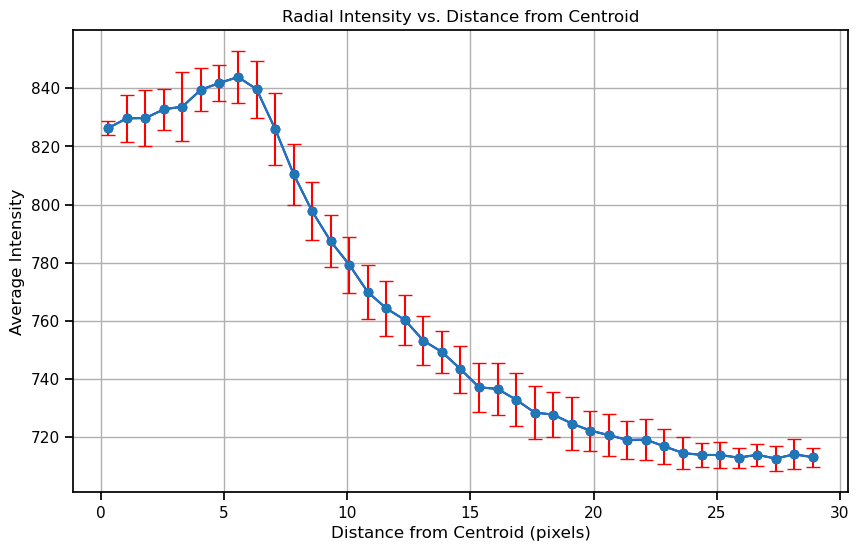

0.009910568792545038
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_017.tif_cropped_blob_1.tif


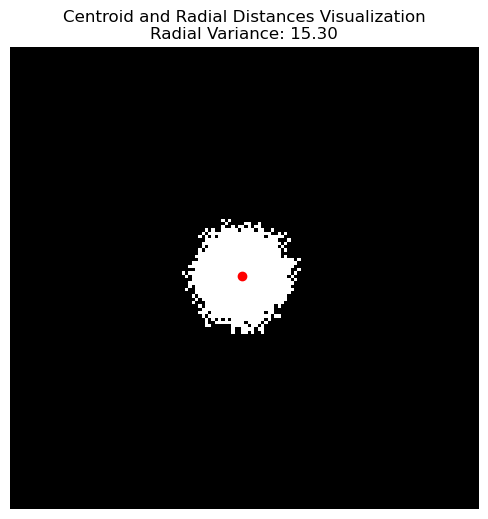

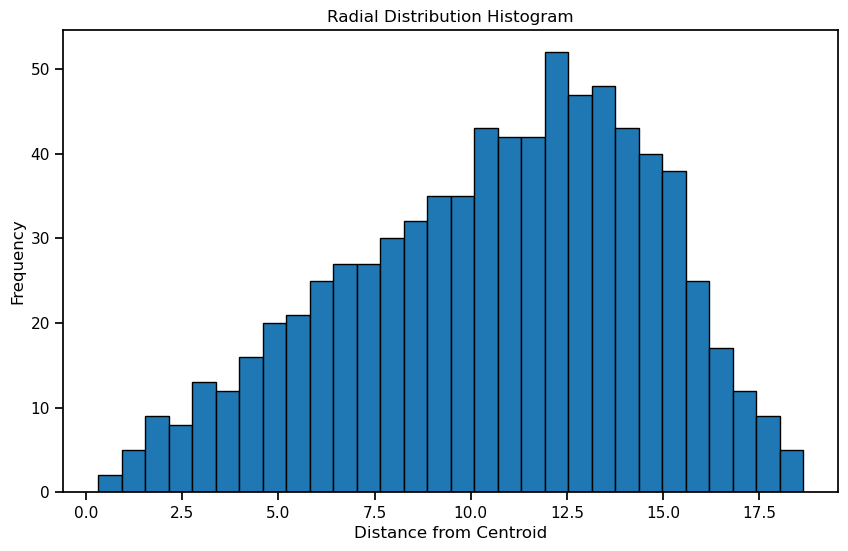

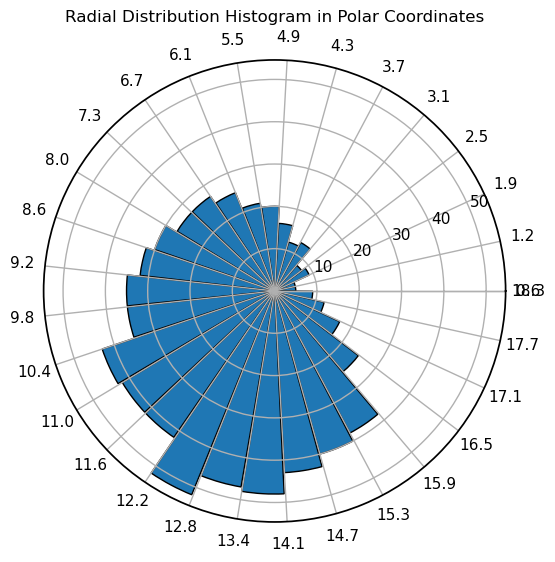

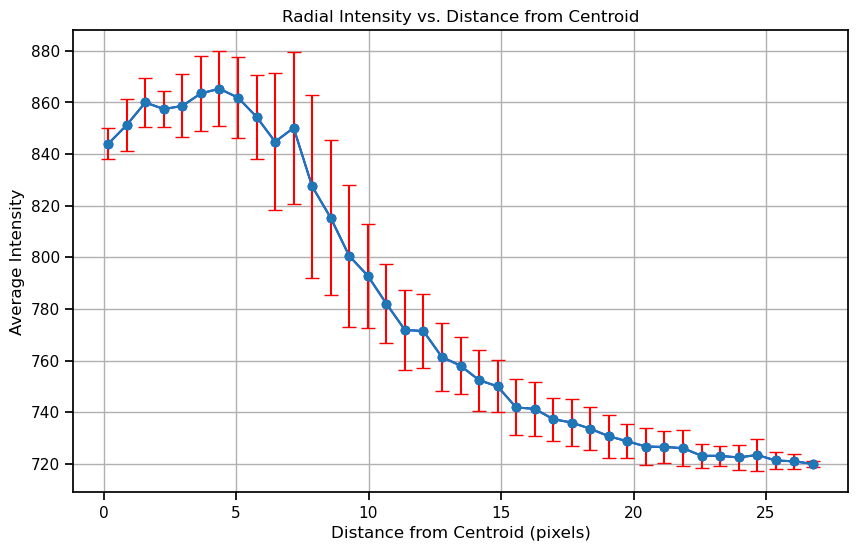

0.015621242072231614
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_010.tif_cropped_blob_1.tif


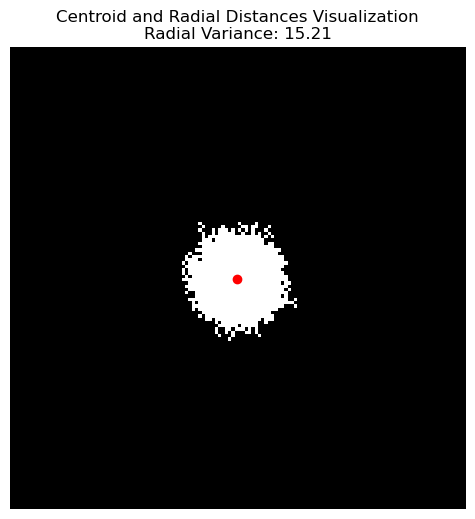

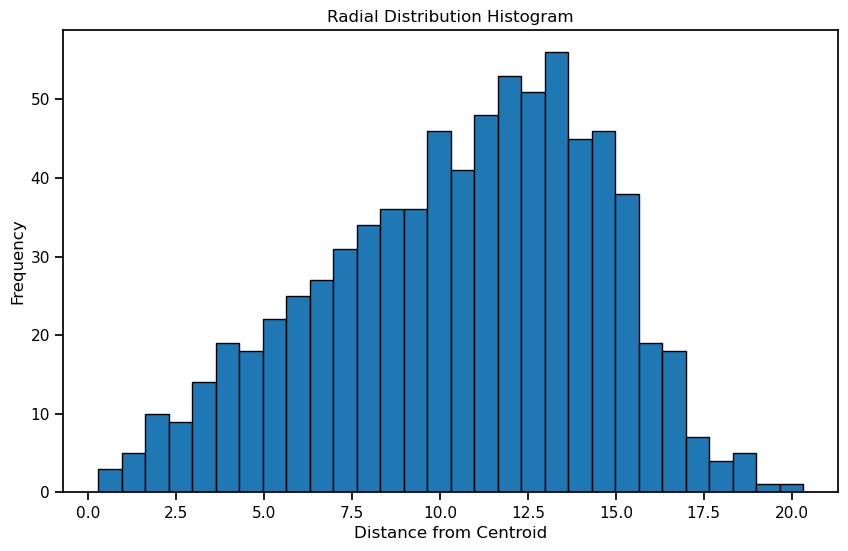

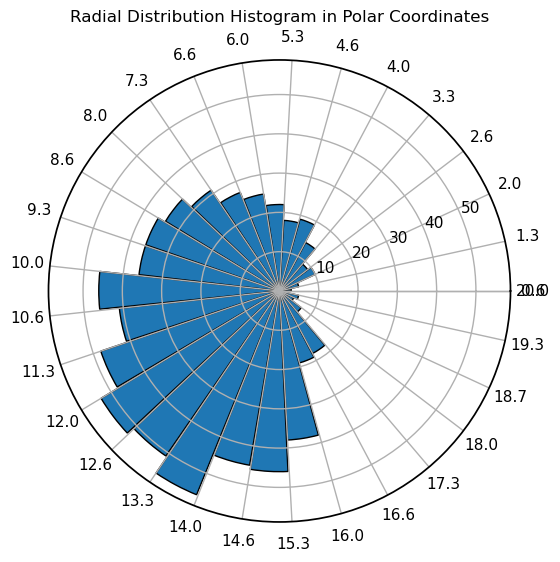

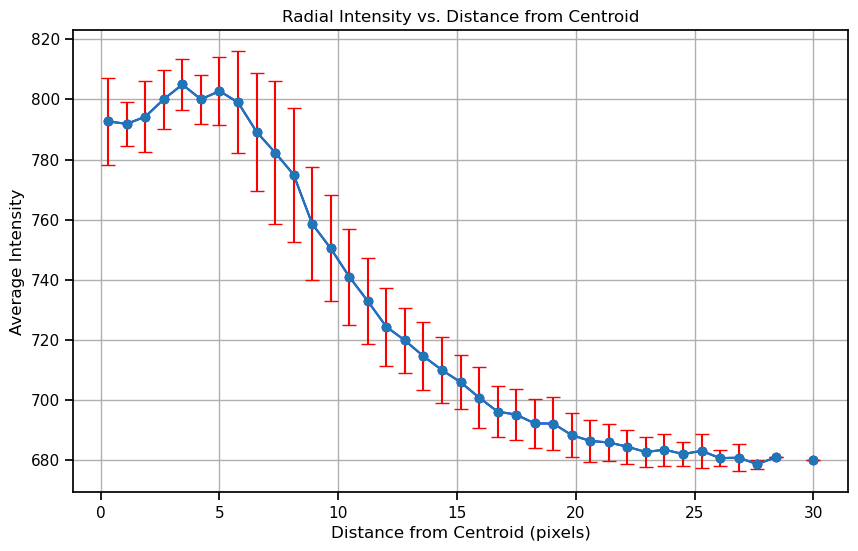

nan
/Users/anshumanjaysingh/Downloads/V-1 in focus cropped blobs/V1_img_000000000_GFP_019.tif_cropped_blob_4.tif


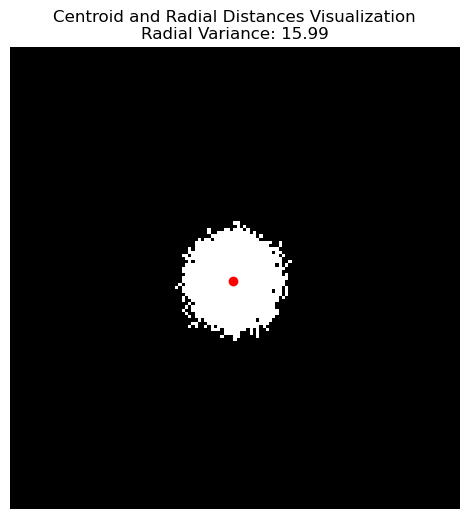

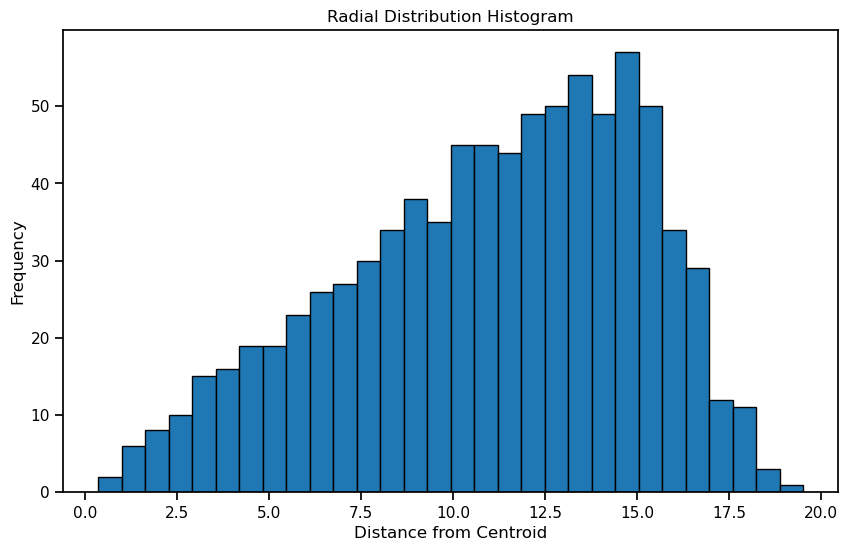

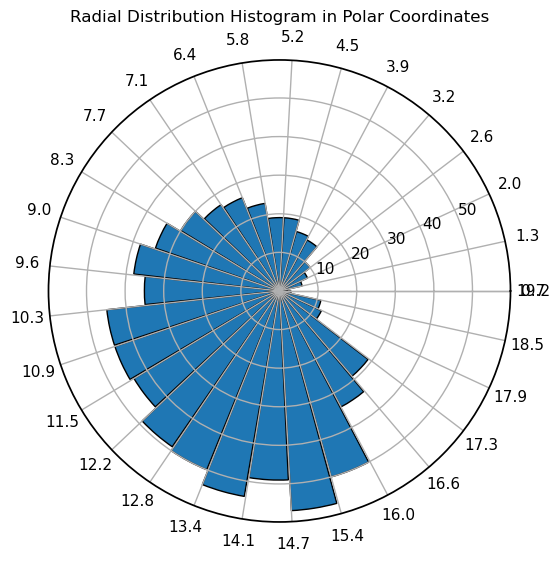

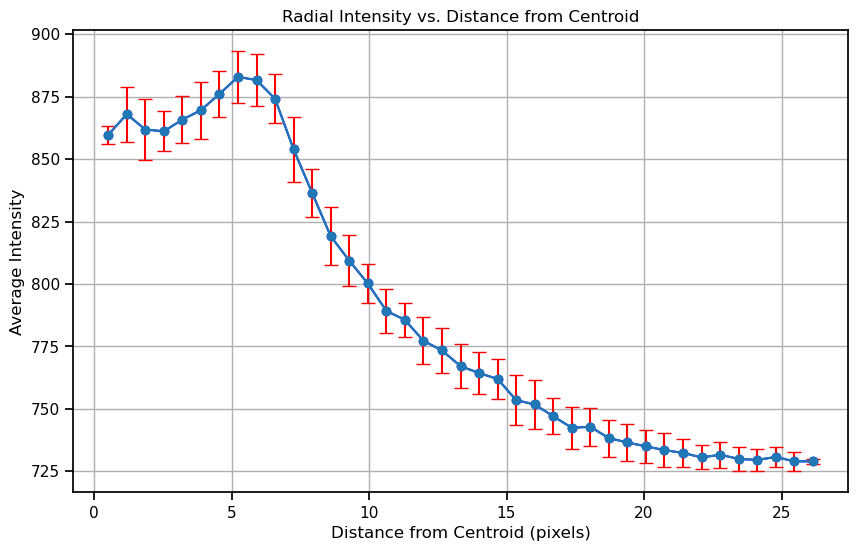

0.010155962778780126


In [2]:
from PIL import Image
import numpy as np
from skimage.measure import label, regionprops
from skimage.io import imsave, imread 
import matplotlib.pyplot as plt
import os  

# Importing necessary functions from skimage
from skimage.filters import threshold_otsu
from skimage import measure 

sns.set_context("notebook")
circ = []
ar = []
radial_variance_arr = []
radial_distance_arr = []
histogram_data = []
name_arr = []
metrics_array = [] 


folder_path = os.getcwd()  # Make sure to define folder_path
tiff_files = [f for f in os.listdir(folder_path) if f.endswith('.tif') and not f.startswith('._')]


for file_name in tiff_files:
    image_path = os.path.join(folder_path, file_name)
    print(image_path)
    name_arr.append(file_name)


    # Load the images
    image = Image.open(image_path)
    image_array = np.array(image)

    # Convert to binary
    threshold = image_array.mean() + 2 * image_array.std()
    binary_image = image_array > threshold

    # Label the objects in the image
    label_image = label(binary_image)

    # Calculate properties of labeled regions
    props = regionprops(label_image)

    # Find the largest object
    largest_object = max(props, key=lambda x: x.area)
    largest_label = largest_object.label

    # Filter to only the largest object
    largest_object_binary = label_image == largest_label

    # Recalculate properties for just the largest object
    largest_props = regionprops(label(largest_object_binary))

    # Circularity and Aspect Ratio of the largest object
    circularity_new = (4 * np.pi * largest_props[0].area) / (largest_props[0].perimeter ** 2)
    aspect_ratio_new = largest_props[0].major_axis_length / largest_props[0].minor_axis_length
    
    centroid_y, centroid_x = largest_props[0].centroid

    # Generating a grid of points for the entire image to compute distances from the centroid
    y_indices, x_indices = np.indices(largest_object_binary.shape)
    distances_from_centroid = np.sqrt((x_indices - centroid_x) ** 2 + (y_indices - centroid_y) ** 2)

    # Mask distances with the binary image to consider only distances within the largest object
    masked_distances = np.ma.masked_where(~largest_object_binary, distances_from_centroid)

    # Calculate radial variance
    radial_variance = np.var(masked_distances.compressed())

    # Visualization
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(largest_object_binary, cmap='gray')
    ax.scatter(centroid_x, centroid_y, color='red')  # Centroid
    ax.set_title(f'Centroid and Radial Distances Visualization\nRadial Variance: {radial_variance:.2f}')
    ax.axis('off')
    plt.show()
    
    # Calculate distances from the centroid to all points within the object
    distances = distances_from_centroid[largest_object_binary]

    # Generate histogram of radial distances
    histogram, bin_edges = np.histogram(distances, bins=30)

    # Plotting the histogram
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(bin_edges[:-1], histogram, width=np.diff(bin_edges), edgecolor="black", align="edge")
    ax.set_title('Radial Distribution Histogram')
    ax.set_xlabel('Distance from Centroid')
    ax.set_ylabel('Frequency')
    plt.show()

    radial_distances=distances
    # Compute histogram
    hist, bin_edges = np.histogram(radial_distances, bins=30)
    np.append(histogram_data,hist)
    

    # Calculate bin centers for labeling
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Convert bin centers to radians for theta
    theta = np.linspace(0, 2 * np.pi, len(hist))

    # Set up a polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

    # Plot the histogram
    bars = ax.bar(theta, hist, width=(2 * np.pi / len(hist)), align='edge', edgecolor='black')

    # Customize the plot
    ax.set_title('Radial Distribution Histogram in Polar Coordinates')
    # Optional: Set the theta (angle) ticks to bin centers or edges
    ax.set_xticks(theta)
    ax.set_xticklabels([f'{edge:.1f}' for edge in bin_centers])

    plt.show()
    
    radial_variance_arr.append(radial_variance)
    ar.append(aspect_ratio_new)
    circ.append(circularity_new)

    
    ##RADIAL INTENSITY SCAN VS DISTANCE

    image = imread(image_path)

    # Preprocess the image - Convert to grayscale if necessary (assuming image is already grayscale or single-channel)

    # Threshold the image to create a binary mask
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value

    # Label the objects in the binary image
    labeled_image = measure.label(binary_image)

    
    # Identify the largest feature
    regions = measure.regionprops(labeled_image, intensity_image=image)
    largest_region = max(regions, key=lambda r: r.area)

    # Extract the binary mask of the largest feature
    largest_feature_mask = labeled_image == largest_region.label

    # Calculate the centroid of the largest feature
    centroid = largest_region.centroid

    # Calculate distances from the centroid to each pixel within the feature
    # Create a meshgrid of coordinates
    coords = np.ogrid[:binary_image.shape[0], :binary_image.shape[1]]
    distances_from_centroid = np.sqrt((coords[0] - centroid[0])**2 + (coords[1] - centroid[1])**2)

    # Map distances to their corresponding intensity values
    intensity_values = image[largest_feature_mask]
    distance_values = distances_from_centroid[largest_feature_mask]

    # Bin the distances and calculate mean intensity for each bin
    bins = np.linspace(distance_values.min(), distance_values.max(), 40)
    digitized = np.digitize(distance_values, bins)
    bin_means = [intensity_values[digitized == i].mean() for i in range(1, len(bins))]
    
    # Plot radial intensity vs. distance
    plt.figure(figsize=(10, 6))
    plt.plot(bins[:-1], bin_means, marker='o', linestyle='-', color='b')
    bin_stds = np.array([intensity_values[digitized == i].std() for i in range(1, len(bins))])
    plt.errorbar(bins[:-1], bin_means, yerr=bin_stds, fmt='-o', ecolor='red', capsize=5, label='Radial Intensity with Std Dev')

    plt.title('Radial Intensity vs. Distance from Centroid')
    plt.xlabel('Distance from Centroid (pixels)')
    plt.ylabel('Average Intensity')
    plt.grid(True)
    plt.show()
    

    # Binning the distances and calculating mean intensity for each bin
    bins = np.linspace(distance_values.min(), distance_values.max(), 40)
    digitized = np.digitize(distance_values, bins)

    # Ensure bin_stds does not contain zeros to avoid division by zero
    bin_stds[bin_stds == 0] = np.min(bin_stds[np.nonzero(bin_stds)])  # Replace 0s with the smallest non-zero value

    # Compute the metric as the sum of average intensities divided by the sum of errors (standard deviations)
    metric =  np.sum(bin_stds)/np.sum(bin_means)
    print(metric)
    metrics_array.append(metric)






(0.0, 1.0)

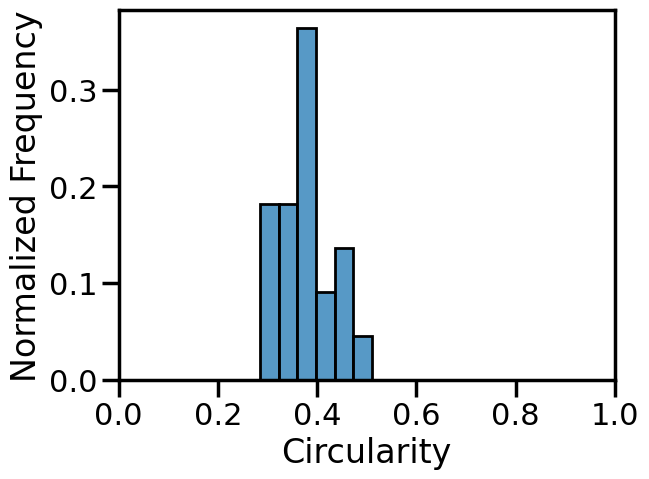

In [6]:
sns.histplot(circ, stat="probability", )
plt.ylabel("Normalized Frequency")
plt.xlabel("Circularity")
plt.xlim(0, 1)

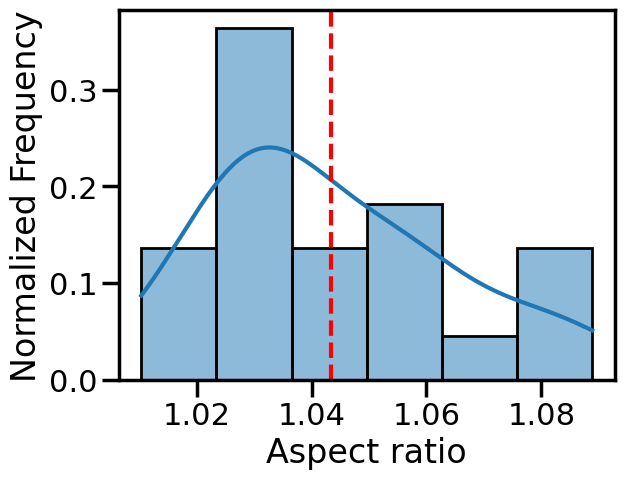

In [11]:
AR=[element for element in ar if element <= 1.5]
sns.histplot(AR, stat="probability",kde="true" )
plt.ylabel("Normalized Frequency")
plt.xlabel("Aspect ratio")
#plt.xlim(1, 1.3)
mean = np.mean(AR)
plt.axvline(mean, color="red", linestyle="dashed")

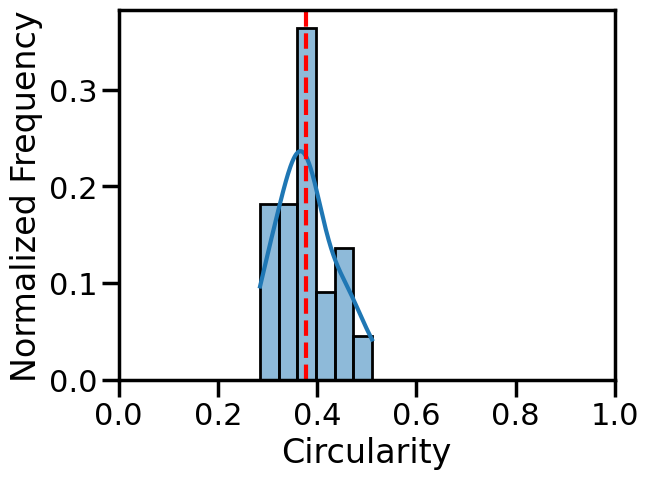

In [12]:
sns.histplot(circ, stat="probability",kde="True" )
plt.ylabel("Normalized Frequency")
plt.xlabel("Circularity")
plt.xlim(0, 1)
mean = np.mean(circ)
plt.axvline(mean, color="red", linestyle="dashed")

13.917215500493567

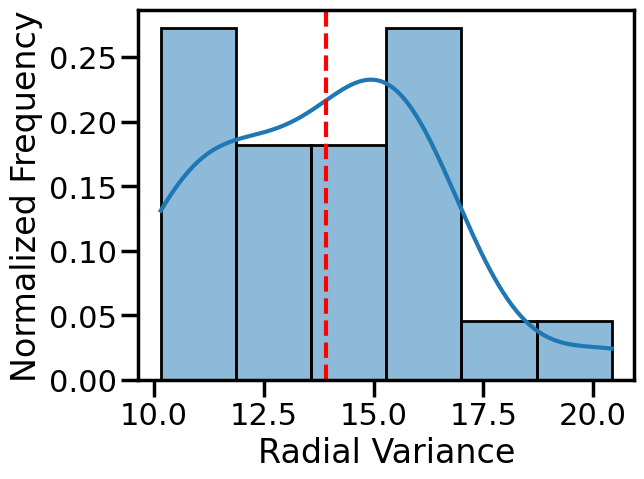

In [13]:
sns.histplot(radial_variance_arr,stat="probability", kde=True )
plt.ylabel("Normalized Frequency")
plt.xlabel("Radial Variance")
mean = np.mean(radial_variance_arr)
#plt.xlim(0, 25)

plt.axvline(mean, color="red", linestyle="dashed")
mean

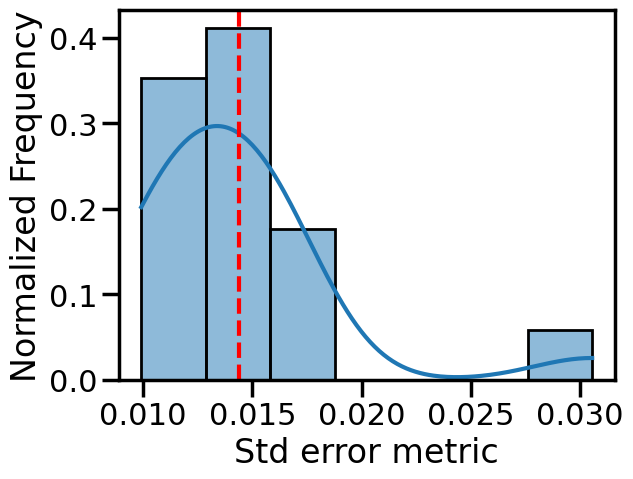

In [14]:
sns.set_context("poster")
filtered_metrics_array = [m for m in metrics_array if not np.isnan(m)]

# Create the histogram plot
sns.histplot(filtered_metrics_array, stat="probability", kde=True)
plt.ylabel("Normalized Frequency")
plt.xlabel("Std error metric")

# Calculate the mean of the filtered metrics array
mean = np.mean(filtered_metrics_array)

# Optionally uncomment the next line to set a limit on the x-axis
#plt.xlim(0, 25)

# Add a vertical line for the mean
plt.axvline(mean, color="red", linestyle="dashed")

# Show the plot
plt.show()

In [17]:
stats = pd.DataFrame(
    {'File Name':tiff_files,
     'Circularity': circ,
     'Aspect Ratio': ar,
     'Radial Variance': radial_variance_arr,
     'Std Error metric': metrics_array
     #'Fluor Asym': asymfluo_arr,
     #'Shape Factor': shapefactor_arr
    })
stats

File Name  Circularity  \
0   V1_img_000000000_GFP_005.tif_cropped_blob_3.tif     0.345974   
1   V1_img_000000000_GFP_002.tif_cropped_blob_2.tif     0.325146   
2   V1_img_000000000_GFP_008.tif_cropped_blob_2.tif     0.457910   
3   V1_img_000000000_GFP_006.tif_cropped_blob_3.tif     0.510614   
4   V1_img_000000000_GFP_001.tif_cropped_blob_1.tif     0.295952   
5   V1_img_000000000_GFP_000.tif_cropped_blob_1.tif     0.297897   
6   V1_img_000000000_GFP_003.tif_cropped_blob_4.tif     0.470825   
7   V1_img_000000000_GFP_007.tif_cropped_blob_1.tif     0.451826   
8   V1_img_000000000_GFP_009.tif_cropped_blob_3.tif     0.389816   
9   V1_img_000000000_GFP_004.tif_cropped_blob_2.tif     0.374053   
10  V1_img_000000000_GFP_004.tif_cropped_blob_3.tif     0.339933   
11  V1_img_000000000_GFP_011.tif_cropped_blob_1.tif     0.354991   
12  V1_img_000000000_GFP_016.tif_cropped_blob_3.tif     0.431488   
13  V1_img_000000000_GFP_020.tif_cropped_blob_2.tif     0.364251   
14  V1_img_000000000_GFP_018.tif_cropped_blob_2.tif     0.362587   
15  V1_img_000000000_GFP_012.tif_cropped_blob_2.tif     0.385055   
16  V1_img_000000000_GFP_015.tif_cropped_blob_1.tif     0.396662   
17  V1_img_000000000_GFP_019.tif_cropped_blob_1.tif     0.360643   
18  V1_img_000000000_GFP_014.tif_cropped_blob_4.tif     0.321009   
19  V1_img_000000000_GFP_017.tif_cropped_blob_1.tif     0.407107   
20  V1_img_000000000_GFP_010.tif_cropped_blob_1.tif     0.284965   
21  V1_img_000000000_GFP_019.tif_cropped_blob_4.tif     0.389184   

    Aspect Ratio  Radial Variance  Std Error metric  
0       1.028513        11.223803               NaN  
1       1.026989        17.084774          0.012906  
2       1.032647        10.953579          0.015910  
3       1.079013        10.150886          0.030552  
4       1.059461        12.796467          0.011701  
5       1.057304        10.946867          0.011104  
6       1.032869        11.172891          0.016827  
7       1.010366        10.285833          0.013067  
8       1.062867        20.419075               NaN  
9       1.047227        14.300356          0.013361  
10      1.019230        13.326871          0.010701  
11      1.088842        15.440705          0.014016  
12      1.020597        12.647318          0.016289  
13      1.037760        15.584166               NaN  
14      1.077548        13.877486               NaN  
15      1.033208        14.976650          0.011227  
16      1.052945        12.671312          0.015605  
17      1.028567        15.354473          0.015316  
18      1.035943        16.464628          0.009911  
19      1.042458        15.302988          0.015621  
20      1.053395        15.212399               NaN  
21      1.027544        15.985214          0.010156

In [19]:
describe=stats.describe()
describe

Circularity  Aspect Ratio  Radial Variance  Std Error metric
count    22.000000     22.000000        22.000000         17.000000
mean      0.378086      1.043422        13.917216          0.014369
std       0.059363      0.020830         2.578678          0.004755
min       0.284965      1.010366        10.150886          0.009911
25%       0.341443      1.028527        11.579682          0.011227
50%       0.369152      1.036852        14.088921          0.013361
75%       0.404496      1.056327        15.419147          0.015621
max       0.510614      1.088842        20.419075          0.030552

In [20]:
stats.to_csv("V1_old_stats.csv",index=False)

In [21]:
describe.to_csv("V1_old_describe.csv")